In [3]:
# Import pandas library
import pandas as pd

# Define the file path to access bank-full.csv dataset
filepath = '../dat/bank-full.csv'

# Use pandas read_csv function to read data from the file and store it in the variable 'data'
# The parameter 'sep' is used to specify that the separator used between values in the csv file is a semicolon (;)
data = pd.read_csv(filepath, sep= ';') 


In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# Importing required libraries
import numpy as np

# Defining the parameters for the exposure definition
col = 'duration'
conditions = [data[col] <= 150, (data[col] > 150)]
choices = [0, 1]

# Adding the calculated values to "treatment_tag" column of dataframe "data"
# "np.select()" function returns an array with elements depending on the conditions and choices specified
data["treatment_tag"] = np.select(conditions, choices, default=np.nan)


In [6]:
# define the name of the column to use for the conditions
col = 'y'

# set up the list of conditions to evaluate on the data
conditions = [
    data[col] == 'no',     # if value in 'y' column equals to 'no'
    data[col] == 'yes'     # if value in 'y' column equals to 'yes'
]

# set up the possible choices/outputs for each condition above
choices = [0, 1]

# create a new column in the dataframe and apply the np.select function which returns the corresponding choice based on the conditions above.
# If no condition matches, default value will be NaN.
data["conversion"] = np.select(conditions, choices, default=np.nan)


In [7]:
#drop null values
data = data.dropna()

### Data Transformation

In [8]:
# Define the bin edges for age and days columns
age_bins = [0, 25, 35, 50, 100]
days_bins = [0, 7, 14, 21, 31]

# Define the labels for age and days bins
age_labels = ['age_0-25', 'age_25-35', 'age_35-50', 'age_50-100']
days_labels = ['days_0-7', 'days_7-14', 'days_14-21', 'days_21-31']

# Bin the age and days columns and convert them to dummy variables
age_dummies = pd.get_dummies(pd.cut(data['age'], bins=age_bins, labels=age_labels))
days_dummies = pd.get_dummies(pd.cut(data['day'], bins=days_bins, labels=days_labels))

# Append the dummy variables to the original dataframe
data = pd.concat([data, age_dummies, days_dummies], axis=1)

### Exploratory Data Analysis

#### Categorical Variables 

               counts         percentage           
conversion        0.0     1.0        0.0        1.0
job                                                
admin.         4540.0   631.0  11.372176  11.930422
blue-collar    9024.0   708.0  22.604078  13.386273
entrepreneur   1364.0   123.0   3.416662   2.325581
housemaid      1131.0   109.0   2.833024   2.060881
management     8157.0  1301.0  20.432343  24.598223
retired        1748.0   516.0   4.378538   9.756098
self-employed  1392.0   187.0   3.486799   3.535640
services       3785.0   369.0   9.480988   6.976744
student         669.0   269.0   1.675768   5.086028
technician     6757.0   840.0  16.925505  15.882019
unemployed     1101.0   202.0   2.757878   3.819247
unknown         254.0    34.0   0.636241   0.642844
             counts         percentage           
conversion      0.0     1.0        0.0        1.0
marital                                          
divorced     4585.0   622.0  11.484896  11.760257
married     24459.0 

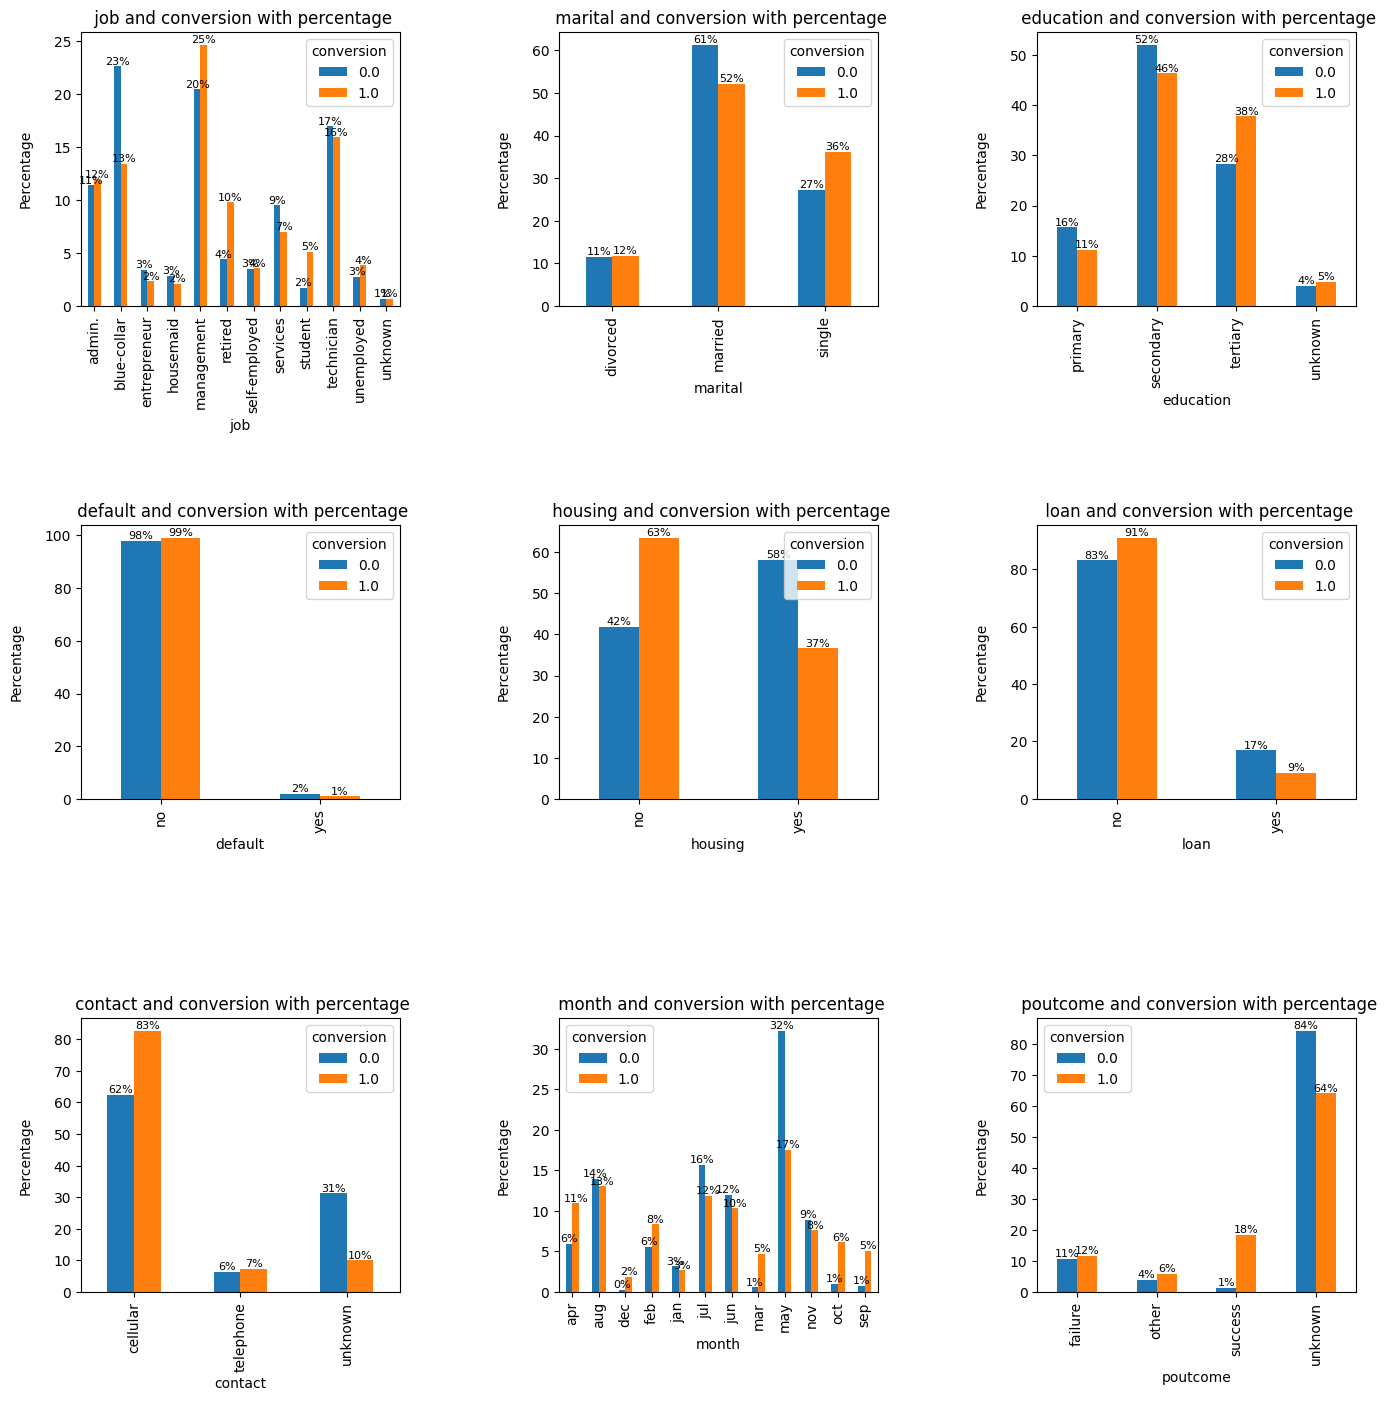

In [ ]:
import matplotlib.pyplot as plt
# List of categorical columns to plot
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Number of columns per row
num_cols = 3

# Calculate number of rows needed
num_rows = 3

# Create a grid plot with one plot for each categorical column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Adjust the spacing between the subplots to give more space for the title and y-axis label
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8, wspace=0.5)
# Loop over the columns and create a plot for each
for i, col in enumerate(categorical_cols):
    # Calculate row and column index for the subplot
    row = i // num_cols
    col_idx = i % num_cols
    
    # Check if there is a subplot for the current categorical column
    if (row, col_idx) in np.ndindex(axs.shape):
        # Group by conversion and the column and calculate count and percentage
        grouped = data.groupby(['conversion', col]).size().reset_index(name='counts')
 
        grouped['percentage'] = grouped.groupby('conversion')['counts'].apply(lambda x: x / x.sum() * 100)


        # Pivot the table to get count and percentage for each conversion value in separate columns
        grouped = grouped.pivot(index=col, columns='conversion', values=['counts', 'percentage'])
        print(grouped)
        # Create stacked bar chart with percentage
        ax = grouped['percentage'].plot.bar(stacked=False, legend=True, ax=axs[row, col_idx])

        # Set title, x-axis label, and y-axis label
        ax.set_title(f' {col} and conversion with percentage')
        ax.set_xlabel(col)
        ax.set_ylabel('Percentage', labelpad=15)

        # Add percentage label on top of each bar
        for p in ax.containers:
            ax.bar_label(p, label_type='edge', labels=[f'{int(round(val))}%' for val in p.datavalues], fontsize=8)

# Show the plot
plt.show()

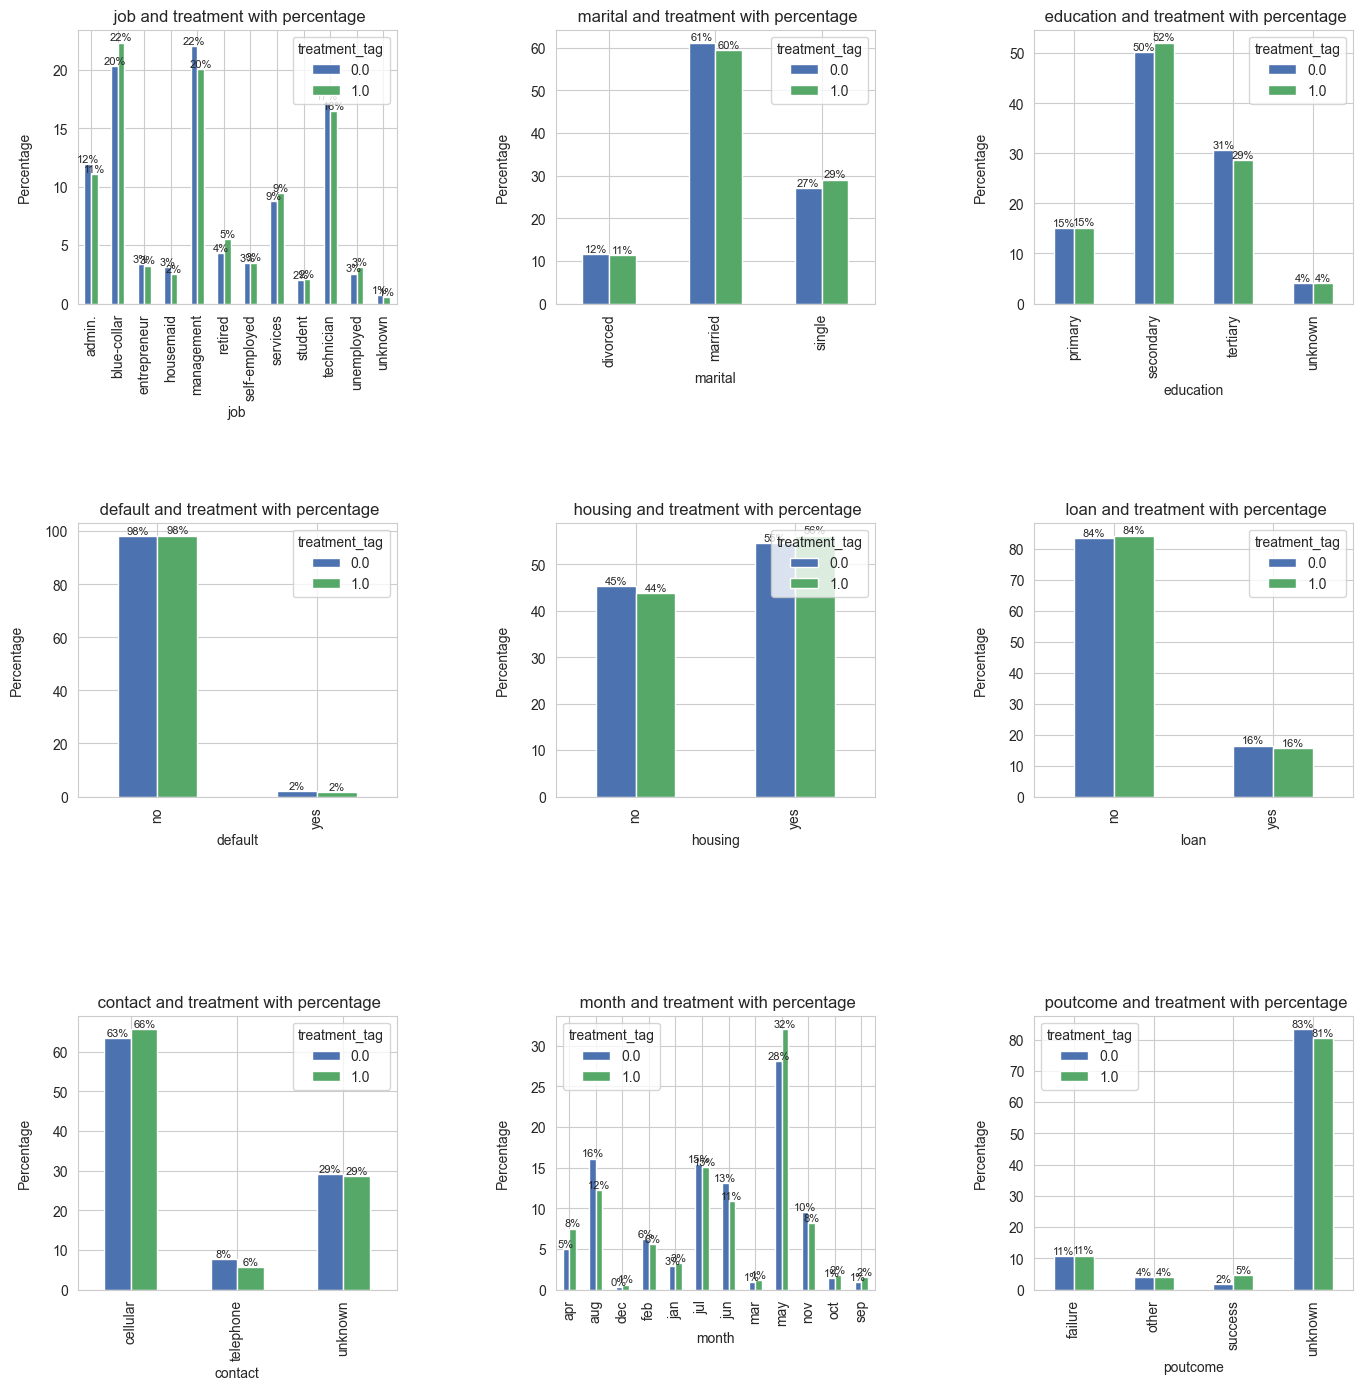

In [ ]:
# List of categorical columns to plot
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Number of columns per row
num_cols = 3

# Calculate number of rows needed
num_rows = 3

# Create a grid plot with one plot for each categorical column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Adjust the spacing between the subplots to give more space for the title and y-axis label
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8, wspace=0.5)
# Loop over the columns and create a plot for each
for i, col in enumerate(categorical_cols):
    # Calculate row and column index for the subplot
    row = i // num_cols
    col_idx = i % num_cols
    
    # Check if there is a subplot for the current categorical column
    if (row, col_idx) in np.ndindex(axs.shape):
        # Group by conversion and the column and calculate count and percentage
        grouped = data.groupby(['treatment_tag', col]).size().reset_index(name='counts')
        grouped['percentage'] = grouped.groupby('treatment_tag')['counts'].apply(lambda x: x / x.sum() * 100)

        # Pivot the table to get count and percentage for each conversion value in separate columns
        grouped = grouped.pivot(index=col, columns='treatment_tag', values=['counts', 'percentage'])

        # Create stacked bar chart with percentage
        ax = grouped['percentage'].plot.bar(stacked=False, legend=True, ax=axs[row, col_idx])

        # Set title, x-axis label, and y-axis label
        ax.set_title(f' {col} and treatment with percentage')
        ax.set_xlabel(col)
        ax.set_ylabel('Percentage', labelpad=15)

        # Add percentage label on top of each bar
        for p in ax.containers:
            ax.bar_label(p, label_type='edge', labels=[f'{int(round(val))}%' for val in p.datavalues], fontsize=8)

# Show the plot
plt.show()

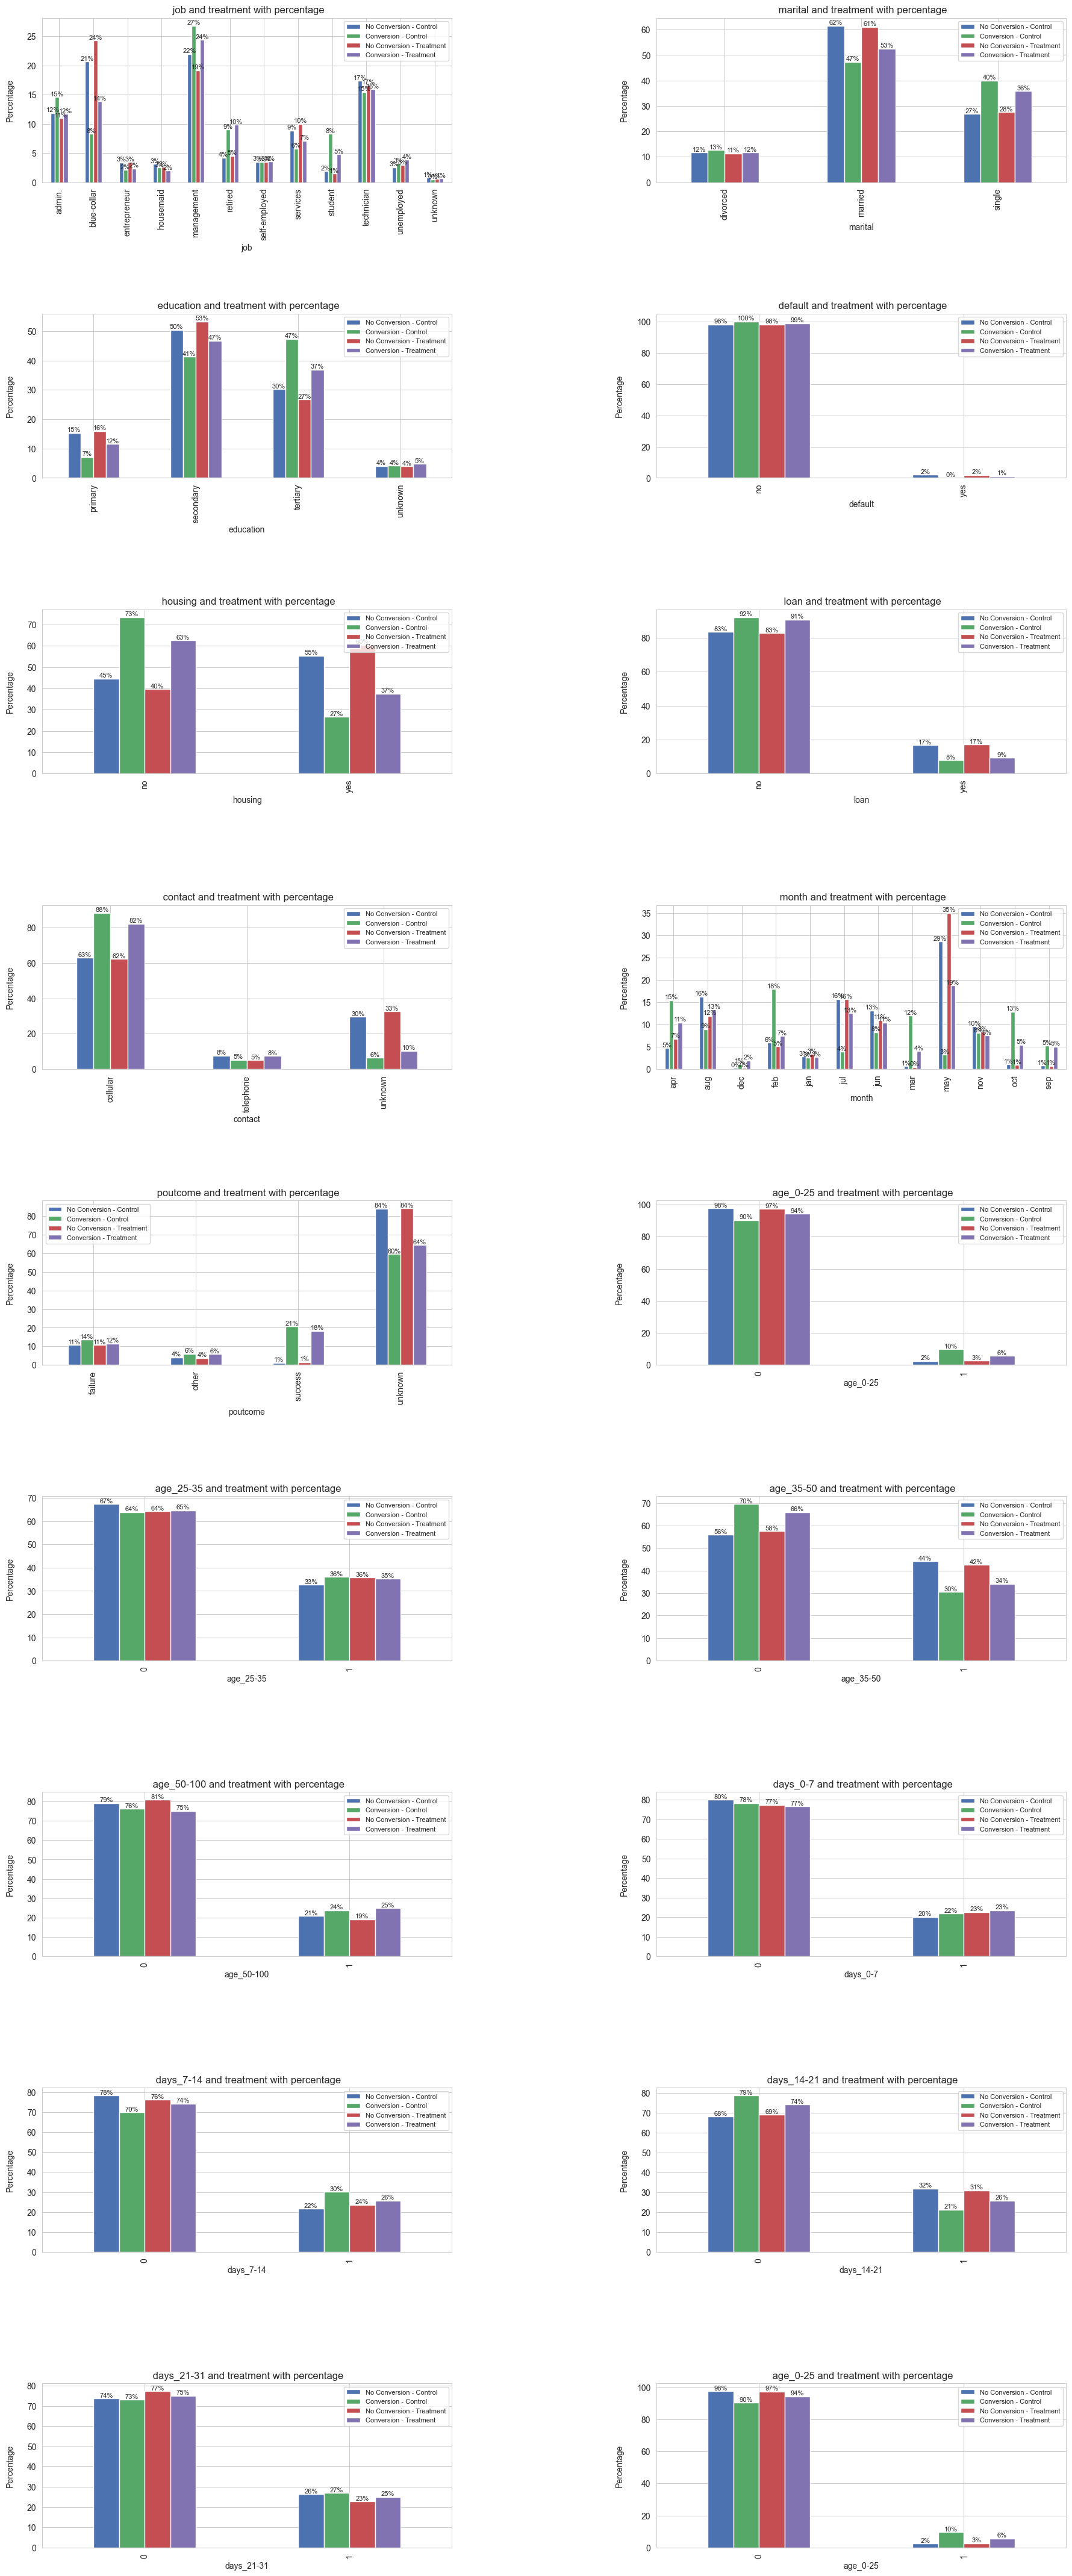

In [ ]:
# List of categorical columns to plot
categorical_cols = categorical_cols + age_labels + days_labels

# Number of columns per row
num_cols = 2

# Calculate number of rows needed
num_rows = 9

# Create a grid plot with one plot for each categorical column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 50))

# Adjust the spacing between the subplots to give more space for the title and y-axis label
plt.subplots_adjust(top=1.92, bottom=1.08, left=1.10, right=1.95, hspace=0.8, wspace=0.5)
# Loop over the columns and create a plot for each
for i, col in enumerate(categorical_cols):
    # Calculate row and column index for the subplot
    row = i // num_cols
    col_idx = i % num_cols
    
    # Check if there is a subplot for the current categorical column
    if (row, col_idx) in np.ndindex(axs.shape):
        # Group by conversion and the column and calculate count and percentage
        grouped = data.groupby(['treatment_tag', 'conversion', col]).size().reset_index(name='counts')
        grouped['percentage'] = grouped.groupby(['treatment_tag','conversion'] )['counts'].apply(lambda x: x / x.sum() * 100)

        # Pivot the table to get count and percentage for each conversion value in separate columns
        grouped = grouped.pivot(index=col, columns=['treatment_tag','conversion'], values=['counts', 'percentage'])

        # Create stacked bar chart with percentage
        ax = grouped['percentage'].plot.bar(stacked=False, legend=True, ax=axs[row, col_idx])

        # Set title, x-axis label, and y-axis label
        ax.set_title(f' {col} and treatment with percentage')
        ax.set_xlabel(col)
        ax.set_ylabel('Percentage', labelpad=15)

        # Add percentage label on top of each bar
        for p in ax.containers:
            ax.bar_label(p, label_type='edge', labels=[f'{int(round(val))}%' for val in p.datavalues], fontsize=8)
            
        # Set legend font size
        # Adjust the font size of the legend
        ax.legend(fontsize=8)

        # Rename the legend labels
        handles, labels = ax.get_legend_handles_labels()
        labels = ['No Conversion - Control', 'Conversion - Control', 'No Conversion - Treatment', 'Conversion - Treatment']
        ax.legend(handles, labels, fontsize=8)

# Show the plot
plt.show()

### Numerical Analysis

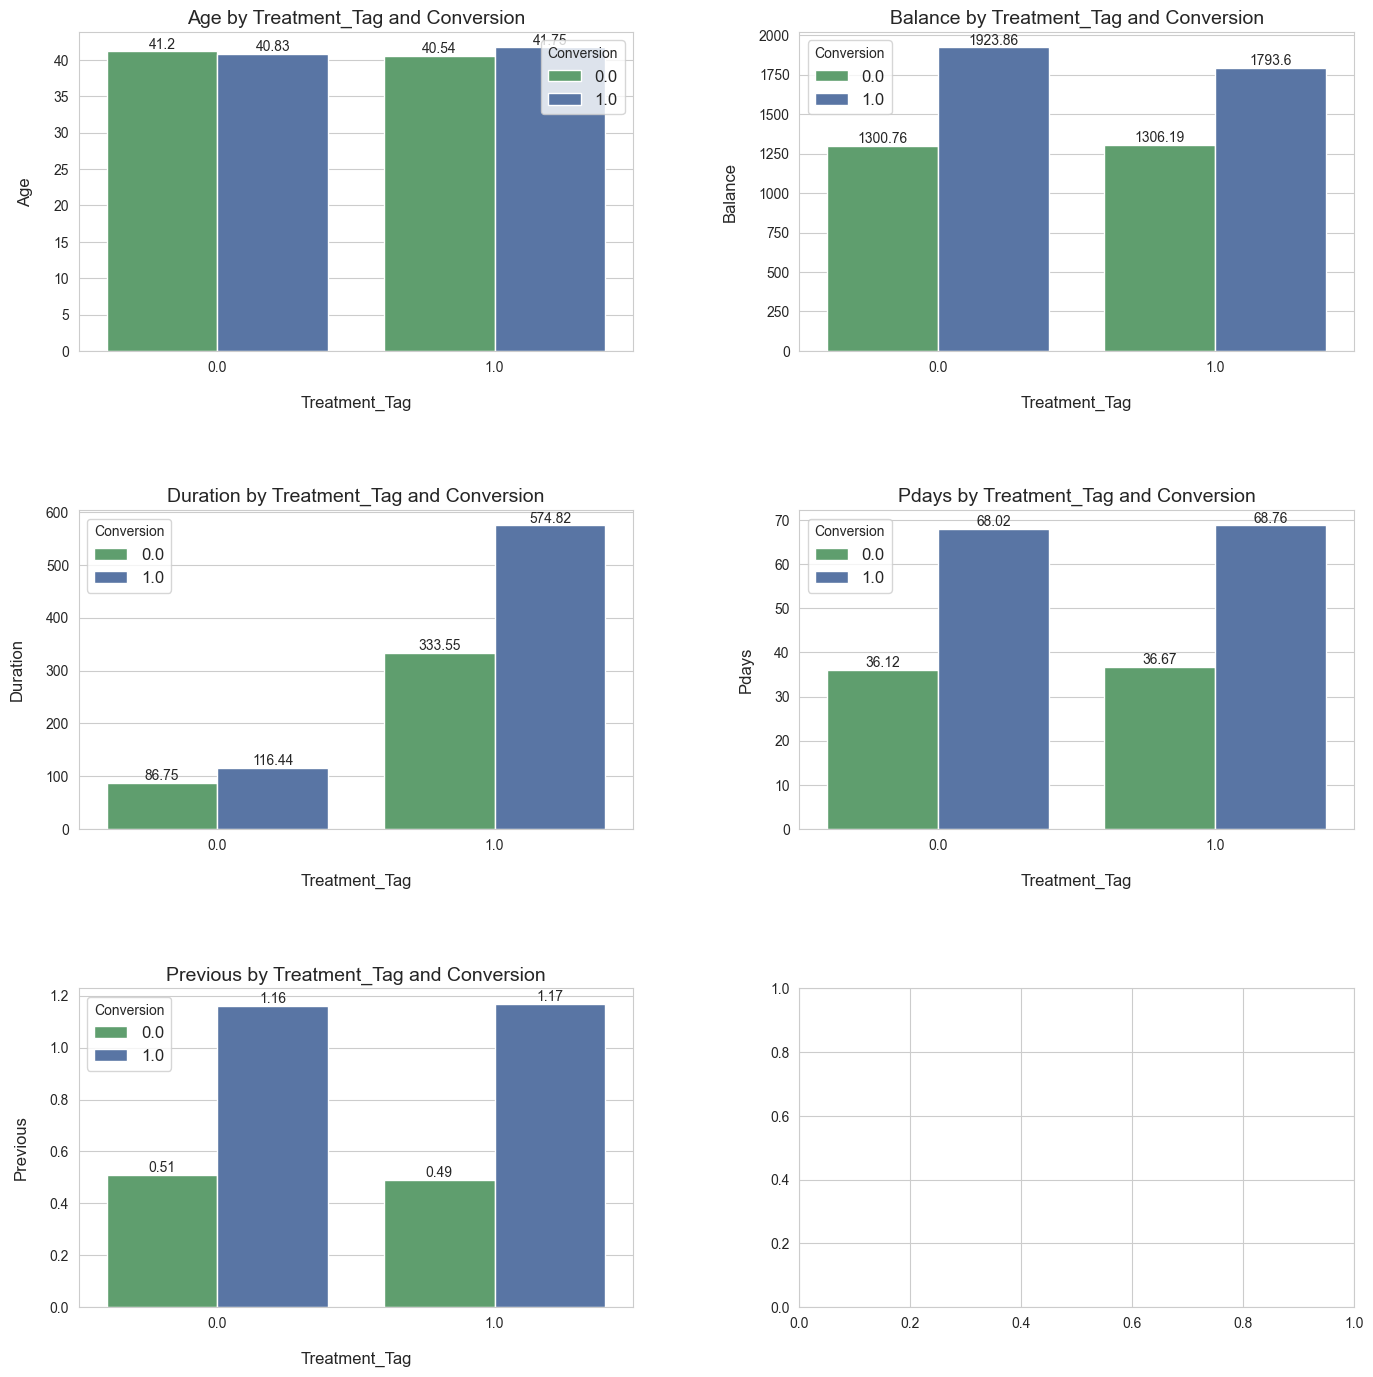

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numerical_cols = ['age', 'balance', 'duration', 'pdays', 'previous']

# List of columns to group by
group_cols = ['treatment_tag', 'conversion']

# Number of columns per row
num_cols = 2

# Calculate number of rows needed
num_rows = len(numerical_cols) // num_cols + 1

# Create a grid plot with one plot for each numerical column
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Loop over the numerical columns and create a plot for each
for i, col in enumerate(numerical_cols):
    # Calculate row and column index for the subplot
    row = i // num_cols
    col_idx = i % num_cols
    
    # Group by treatment_tag, conversion, and the column and calculate mean
    grouped = data.groupby(group_cols)[col].mean().round(2).reset_index()
    
    # Create bar chart with mean values
    ax = sns.barplot(x=group_cols[0], y=col, hue=group_cols[1], data=grouped, ax=axs[row, col_idx], palette=['#55A868', '#4C72B0'])
    
    # Set title
    ax.set_title(f'{col.title()} by {group_cols[0].title()} and {group_cols[1].replace("_", " ").title()}', fontsize=14)
    
    # Set legend title
    legend_title = group_cols[1].replace('_', ' ').title()
    ax.legend(title=legend_title, fontsize=12)
    
    # Set x-axis label
    ax.set_xlabel(group_cols[0].title(), labelpad=15, fontsize=12)
    
    # Set y-axis label
    ax.set_ylabel(col.title(), labelpad=15, fontsize=12)
    
    # Add markers on the plot
    for p in ax.containers:
        ax.bar_label(p, label_type='edge', fontsize=10)

# Adjust the spacing between the subplots to give more space for the title and y-axis label
plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.95, hspace=0.5, wspace=0.3)

# Show the plot
plt.show()


### Feature Engineering 

In [ ]:
data.to_csv('../dat/feature_eng_data.csv', index = False)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np


# Split the data into training and test sets, stratifying by treatment and conversion
stratify_cols = pd.concat([data['treatment_tag'], data['conversion']], axis=1)
X_train, X_test, trmnt_train, trmnt_test, y_train, y_test = train_test_split(
    data, data['treatment_tag'], data['conversion'], stratify=stratify_cols, test_size=0.2, random_state=42)

# Filter the columns to keep only the relevant ones
numeric_features = [ 'balance', 'previous', 'pdays']
categorical_features = [ 'job', 'marital','education','default','housing','loan', 'contact', 'poutcome', 'month']
other_bins = ['age_0-25','age_25-35', 'age_35-50', 'age_50-100', 'days_0-7', 'days_7-14', 'days_14-21', 'days_21-31']

X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features ]

X_train_cat = pd.get_dummies(X_train[categorical_features])
X_test_cat = pd.get_dummies(X_test[categorical_features])

# create a list of columns to drop
columns_to_drop = [col for col in X_train_cat.columns if ('_unknown' in col or '_nonexistent' in col or '_other' in col)]

# drop the columns
X_traincat= X_train_cat.drop(columns_to_drop, axis=1)
X_testcat= X_test_cat.drop(columns_to_drop, axis=1)

X_train_other = X_train[other_bins]
X_test_other = X_test[other_bins]

X_train_2 = pd.concat([X_train_num, X_traincat, X_train_other ], axis=1)
X_test_2 = pd.concat([X_test_num, X_testcat,X_test_other ], axis=1)


# Scale the numeric features
scaler = StandardScaler()
X_train_2[numeric_features] = scaler.fit_transform(X_train_2[numeric_features])
X_test_2[numeric_features] = scaler.transform(X_test_2[numeric_features])

# Concatenate the feature names
categorical_feature_names = X_train_cat.columns
feature_names = np.concatenate([numeric_features, categorical_feature_names])

# Print the final shapes of the training and test data
print(f"Train shape: {X_train_2.shape}")
print(f"Test shape: {X_test_2.shape}")


Train shape: (36168, 50)
Test shape: (9043, 50)


In [8]:
X_train_2.select_dtypes(include=['uint8']).columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_success', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'age_0-25', 'age_25-35',
       'age_35-50', 'age_50-100', 'days_0-7', 'days_7-14', 'days_14-21',
       'days_21-31'],
      dtype='object')

In [ ]:
# Save y_train, y_test, trmnt_train, and trmnt_test to CSV files
y_train.to_csv("../dat/y_train.csv", index=False)
y_test.to_csv("../dat/y_test.csv", index=False)
trmnt_train.to_csv("../dat/trmnt_train.csv", index=False)
trmnt_test.to_csv("../dat/trmnt_test.csv", index=False) 
X_train_2.to_csv("../dat/X_train.csv", index=False)
X_test_2.to_csv("../dat/X_test.csv", index=False)

## Base Model

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


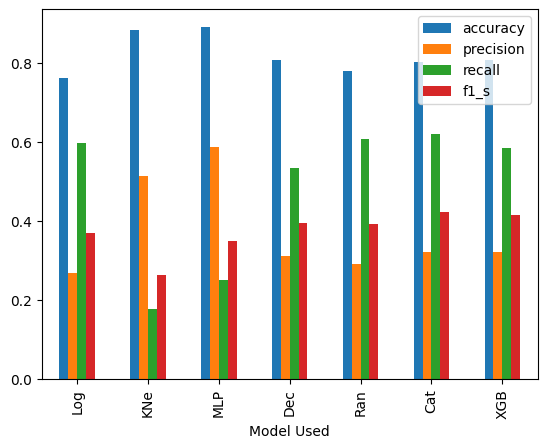

In [ ]:
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

algo_list = [LogisticRegression(class_weight='balanced', max_iter=500),  
             KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
             MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=1000),
             DecisionTreeClassifier(max_depth=7, random_state=0,class_weight='balanced'),            
             RandomForestClassifier(max_depth=7, random_state=0, n_estimators=10,class_weight='balanced'),           
             CatBoostClassifier(verbose=0, class_weights=[1, 1/y_train.mean()]),
             XGBClassifier(scale_pos_weight=1/y_train.mean())]
model_abbr = []

def model_test(X_train, X_test, y_train, y_test, algo_list):
    
    start_time = time()
    accuracy = []
    precision = []
    recall = []
    f1_s = []
    
    for each_model in algo_list:
          # Define model abbreviation
        abbr = each_model.__class__.__name__[:3]
        model_abbr.append(abbr)
        classifier = each_model.fit(X_train, y_train)
        pred = classifier.predict(X_test)

        acc = accuracy_score(y_test, pred)
        accuracy.append(acc)
        prec = precision_score(y_test, pred)
        precision.append(prec)
        rec = recall_score(y_test, pred)
        recall.append(rec)
        f1 = f1_score(y_test, pred)
        f1_s.append(f1)
        

        #print("%s = %.2f" % (each_model.__class__.__name__[:3], round(acc, 2)))
       # print("%s = %.2f" % (each_model.__class__.__name__[:3], round(prec, 2)))
       # print("%s = %.2f" % (each_model.__class__.__name__[:3], round(rec, 2)))
       # print("%s = %.2f" % (each_model.__class__.__name__[:3], round(f1, 2)))

    metrics_data = pd.DataFrame(zip(model_abbr, accuracy, precision, recall, f1_s), columns=['Model Used', 'accuracy', 'precision', 'recall', 'f1_s'])
        
    return metrics_data

results_df = model_test(X_train=X_train_2, X_test=X_test_2, y_train=y_train, y_test=y_test, algo_list=algo_list)

# create a plot of the results for each algorithm
results_df.plot(x='Model Used', y=['accuracy', 'precision', 'recall', 'f1_s'], kind='bar')
plt.show()

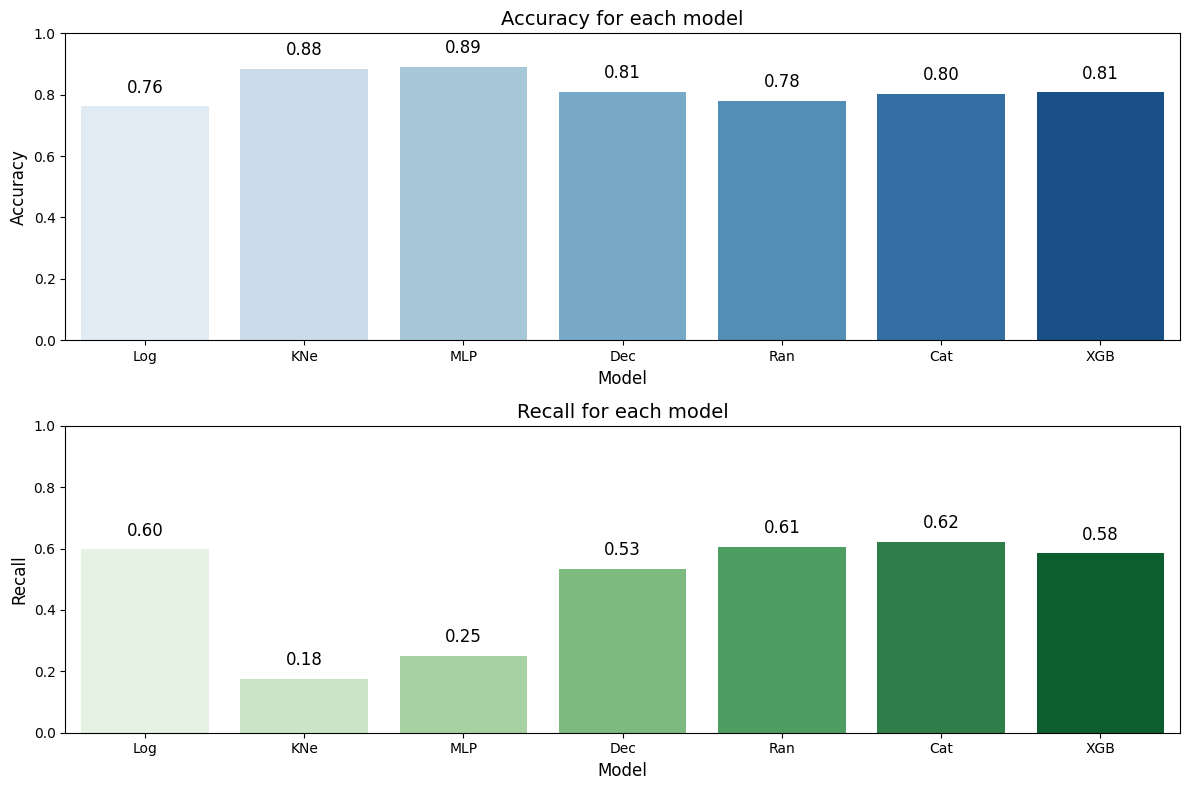

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot with accuracy for each model
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
sns.barplot(x='Model Used', y="accuracy", data=results_df, ax=axs[0], palette='Blues')
axs[0].set_title("Accuracy for each model", fontsize=14)
axs[0].set_xlabel("Model", fontsize=12)
axs[0].set_ylabel("Accuracy", fontsize=12)
axs[0].set_ylim([0, 1])

# Add labeled markers for the accuracy scores
for i, score in enumerate(results_df['accuracy']):
    axs[0].annotate(f'{score:.2f}', (results_df.index[i], score), textcoords='offset points', xytext=(0,10), ha='center', fontsize=12)

# Create a bar plot with recall for each model
sns.barplot(x='Model Used', y="recall", data=results_df, ax=axs[1], palette='Greens')
axs[1].set_title("Recall for each model", fontsize=14)
axs[1].set_xlabel("Model", fontsize=12)
axs[1].set_ylabel("Recall", fontsize=12)
axs[1].set_ylim([0, 1])

# Add labeled markers for the recall scores
for i, score in enumerate(results_df['recall']):
    axs[1].annotate(f'{score:.2f}', (results_df.index[i], score), textcoords='offset points', xytext=(0,10), ha='center', fontsize=12)

# Adjust the spacing between the subplots and ensure that the legend does not overlap with the subplots
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()

# Show the plot
plt.show()

## Hyperparameter Tuning and Model Tracking 

In [ ]:
import mlflow 
# Define the models
algo_list = [
    LogisticRegression(class_weight='balanced', max_iter=500),
    KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                         weights='uniform'),
    MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=1000),
    DecisionTreeClassifier(max_depth=7, random_state=0, class_weight='balanced'),            
    RandomForestClassifier(max_depth=7, random_state=0, n_estimators=10, class_weight='balanced'),           
    CatBoostClassifier(verbose=0, class_weights=[1, 1/y_train.mean()]),
    XGBClassifier(scale_pos_weight=1/y_train.mean())
]



def run_model(algo_list, X_train, X_test, y_train, y_test, random_state=42):
    
    # Define the hyperparameters for each model
    hyperparameters = {
    'LogisticRegression': [{'C': 0.1}, {'C': 1}, {'C': 10} ],
    'KNeighborsClassifier': [{'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 10, 'weights': 'distance'}, {'n_neighbors': 20, 'weights': 'distance'}],
    'MLPClassifier': [{'alpha': 0.0001, 'hidden_layer_sizes': (5,)}, {'alpha': 0.0001, 'hidden_layer_sizes': (10,)}, {'alpha': 0.0001, 'hidden_layer_sizes': (20,)}],
    'DecisionTreeClassifier': [{'max_depth': 5}, {'max_depth': 10}, {'max_depth': 15}],
    'RandomForestClassifier': [{'n_estimators': 5, 'max_depth': 5}, {'n_estimators': 10, 'max_depth': 10}, {'n_estimators': 100, 'max_depth': 15}],
    'CatBoostClassifier': [{'iterations': 50, 'learning_rate': 0.01}, {'iterations': 100, 'learning_rate': 0.05}, {'iterations': 200, 'learning_rate': 0.1} ],
    'XGBClassifier': [{'max_depth': 5, 'learning_rate': 0.01}, {'max_depth': 10, 'learning_rate': 0.05}, {'max_depth': 15, 'learning_rate': 0.1}]
    }
    
    # Define an empty DataFrame to store the results
    results_df = pd.DataFrame(columns=['Model', 'Hyperparameters', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
    
    # Loop over the models and hyperparameters and train and evaluate each model
    for i, each_model in enumerate(algo_list):
        # Define model abbreviation
        abbr = each_model.__class__.__name__[:4].lower()
        print(abbr)
        
        # Get the hyperparameters for the model
        hyperparams = hyperparameters[each_model.__class__.__name__]
        
        for j, params in enumerate(hyperparams):
            with mlflow.start_run():
                # Set the experiment name
                mlflow.set_experiment("Bank Campaign base case included ")
                
                # Log the model parameters
                mlflow.log_param("model", abbr)
                mlflow.log_param("hyperparameters", params)
                
                # Train and evaluate the model
                # Train and evaluate the model
                if abbr != 'catb':
                    classifier = each_model.set_params(**params).fit(X_train, y_train)
                else:
                    each_model.fit(X_train, y_train)

                pred = classifier.predict(X_test)
                acc = accuracy_score(y_test, pred)
                prec = precision_score(y_test, pred)
                rec = recall_score(y_test, pred)
                f1 = f1_score(y_test, pred)
                
                # Log the model performance metrics
                mlflow.log_metric("accuracy", acc)
                mlflow.log_metric("precision", prec)
                mlflow.log_metric("recall", rec)
                mlflow.log_metric("f1_score", f1)
                
                # Print the model performance metrics
                print(f"{abbr} with hyperparameters {params} - accuracy: {acc}, precision: {prec}, recall: {rec}, f1_score: {f1}")
                
                # Save the trained model
                mlflow.sklearn.log_model(classifier, f"model_{abbr}_hyperparams_{j}")

            # Add the results to the results dataframe
                results_df = results_df.append({'Model': abbr, 'Hyperparameters': params, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}, ignore_index=True)
    return results_df  

In [ ]:
import warnings
warnings.filterwarnings("ignore")

results_df = run_model(algo_list, X_train_2, X_test_2, y_train, y_test, random_state=42)

logi


2023/03/05 21:52:48 INFO mlflow.tracking.fluent: Experiment with name 'Bank Campaign base case included ' does not exist. Creating a new experiment.


logi with hyperparameters {'C': 0.1} - accuracy: 0.7606988831140108, precision: 0.2678421494542401, recall: 0.6030245746691871, f1_score: 0.3709302325581395
logi with hyperparameters {'C': 1} - accuracy: 0.7618047108260533, precision: 0.2677966101694915, recall: 0.5973534971644613, f1_score: 0.3698069046225863
logi with hyperparameters {'C': 10} - accuracy: 0.7615835452836448, precision: 0.26756985605419137, recall: 0.5973534971644613, f1_score: 0.3695906432748538
knei
knei with hyperparameters {'n_neighbors': 5, 'weights': 'uniform'} - accuracy: 0.8841092557779497, precision: 0.5138121546961326, recall: 0.17580340264650285, f1_score: 0.2619718309859155
knei with hyperparameters {'n_neighbors': 10, 'weights': 'distance'} - accuracy: 0.8751520513104059, precision: 0.4172494172494173, recall: 0.16918714555765596, f1_score: 0.24075319435104237
knei with hyperparameters {'n_neighbors': 20, 'weights': 'distance'} - accuracy: 0.8805706070994139, precision: 0.46646341463414637, recall: 0.1446

In [ ]:
import pandas as pd
# Step 1: Create a dictionary mapping each unique Model value to an integer index
model_to_index = {model: i+1 for i, model in enumerate(results_df['Model'].unique())}

# Step 2: Map the Model column to the corresponding integer indices
results_df['ModelIndex'] = results_df['Model'].map(model_to_index)

# Step 3: Assign the new column to the dataframe
results_df = results_df[['ModelIndex', 'Model', 'Hyperparameters', 'Accuracy', 'Precision', 'Recall', 'F1-score']]

In [ ]:
# Step 1: Create a dictionary mapping each unique Model value to an abbreviation
model_to_abbrev = {model: f"{model.lower()[:4]}{i+1}" for i, model in enumerate(results_df['Model'].unique())}

# Step 2: Map the Model and Hyperparameters columns to a tuple representing the unique combination of Model and Hyperparameters
results_df['Model_Param'] = list(zip(results_df['Model'], results_df['Hyperparameters']))

# Step 3: Create a new column with the unique Model_Param values mapped to abbreviated model names and observation indices
results_df['ModelIndex_ParamIndex'] = results_df['Model_Param'].map(lambda x: f"{model_to_abbrev[x[0]]} obs{list(results_df['Model_Param']).index(x)+1}")

# Step 4: Drop the intermediate Model_Param column
results_df = results_df.drop(columns=['Model_Param'])

results_df.head()

,ModelIndex,Model,Hyperparameters,Accuracy,Precision,Recall,F1-score,ModelIndex_ParamIndex
0,1,logi,{'C': 0.1},0.760699,0.267842,0.603025,0.370930,logi1 obs1
1,1,logi,{'C': 1},0.761805,0.267797,0.597353,0.369807,logi1 obs2
2,1,logi,{'C': 10},0.761584,0.267570,0.597353,0.369591,logi1 obs3
3,2,knei,"{'n_neighbors': 5, 'weights': 'uniform'}",0.884109,0.513812,0.175803,0.261972,knei2 obs4
4,2,knei,"{'n_neighbors': 10, 'weights': 'distance'}",0.875152,0.417249,0.169187,0.240753,knei2 obs5


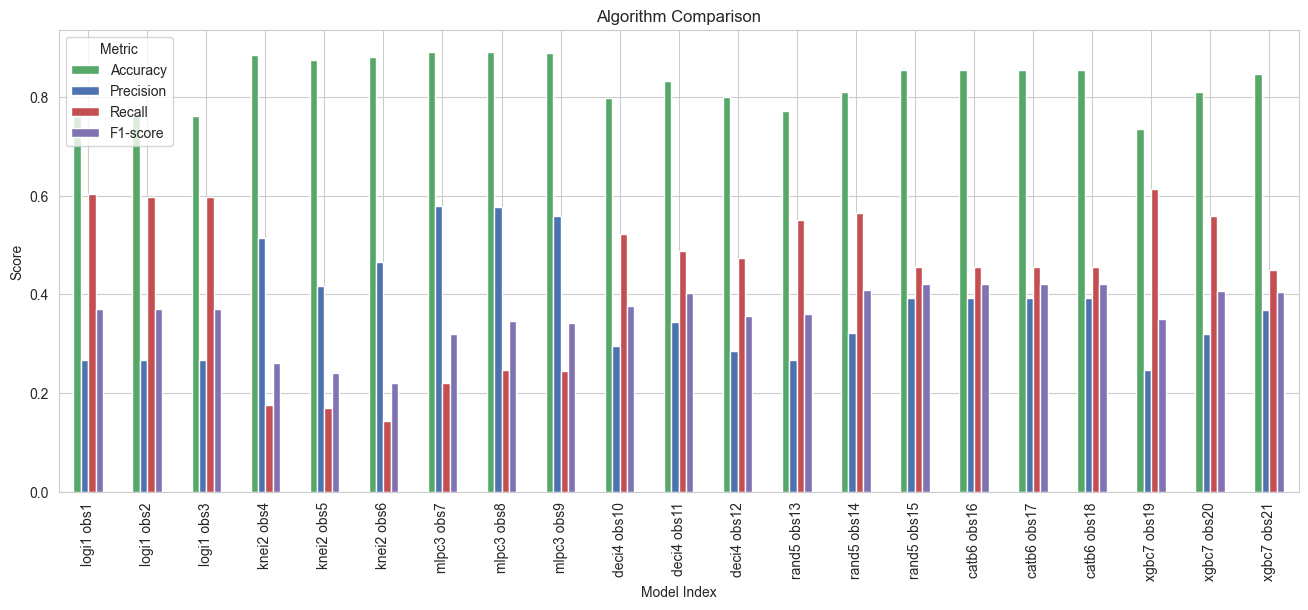

In [ ]:
# Define colors for the plot
colors = ['#55A868', '#4C72B0', '#C44E52', '#8172B2']

# Create a bar plot of the results for each algorithm
fig, ax = plt.subplots(figsize=(16, 6))
results_df.plot(x='ModelIndex_ParamIndex', y=['Accuracy', 'Precision', 'Recall', 'F1-score'], kind='bar', ax=ax, color=colors)

# Customize the plot appearance
ax.set_xlabel('Model Index')
ax.set_ylabel('Score')
ax.set_title('Algorithm Comparison')
ax.legend(title='Metric', loc='upper left')

# Show the plot
plt.show()


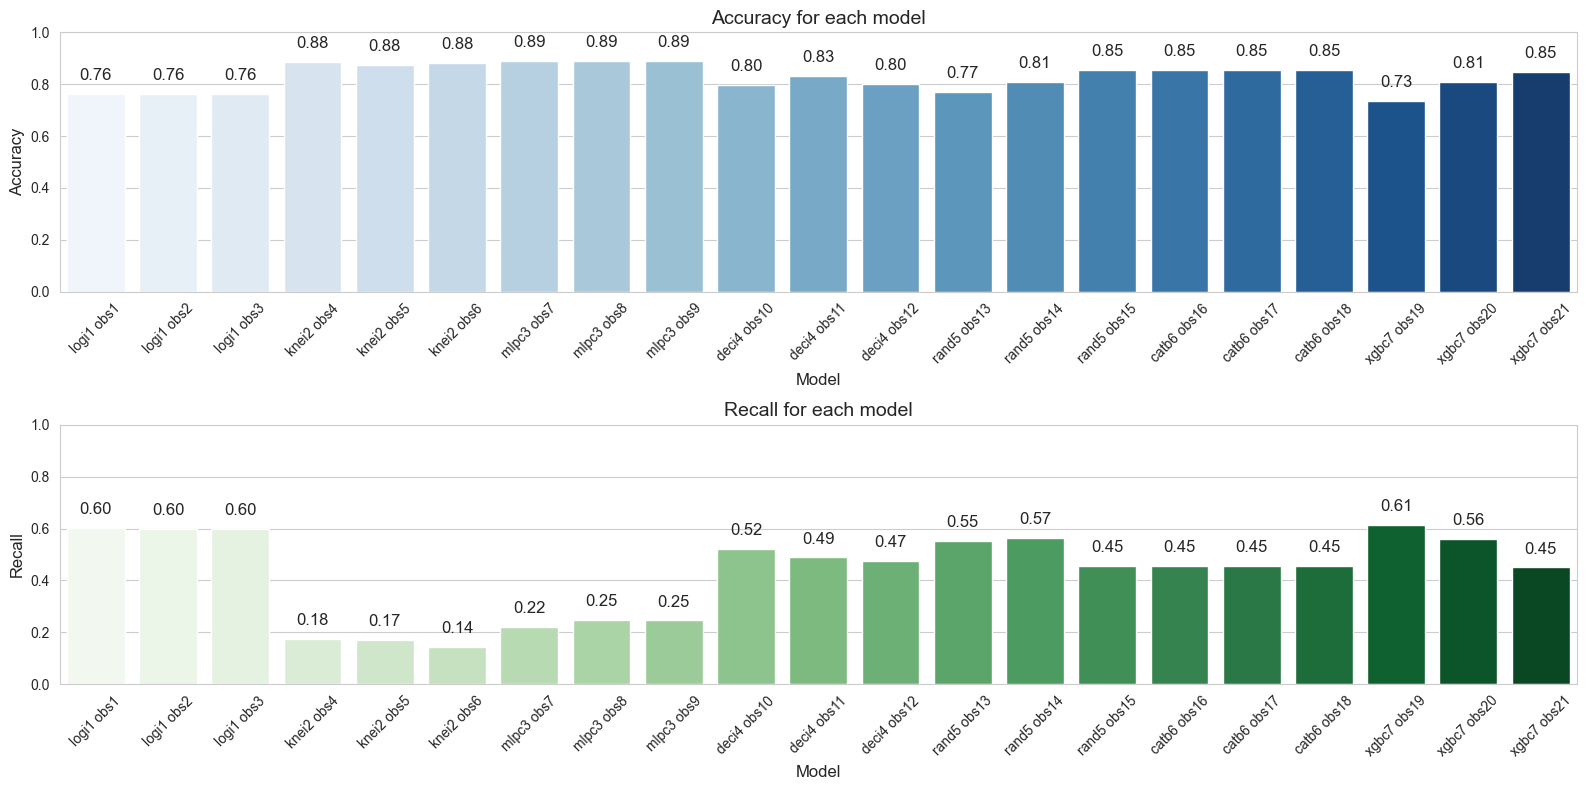

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot with accuracy for each model
fig, axs = plt.subplots(2, 1, figsize=(16, 8))
sns.barplot(x='ModelIndex_ParamIndex', y="Accuracy", data=results_df, ax=axs[0], palette='Blues')
axs[0].set_title("Accuracy for each model", fontsize=14)
axs[0].set_xlabel("Model", fontsize=12)
axs[0].set_ylabel("Accuracy", fontsize=12)
axs[0].set_ylim([0, 1])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

# Add labeled markers for the accuracy scores
for i, score in enumerate(results_df['Accuracy']):
    axs[0].annotate(f'{score:.2f}', (results_df.index[i], score), textcoords='offset points', xytext=(0,10), ha='center', fontsize=12)

# Create a bar plot with recall for each model
sns.barplot(x='ModelIndex_ParamIndex', y="Recall", data=results_df, ax=axs[1], palette='Greens')
axs[1].set_title("Recall for each model", fontsize=14)
axs[1].set_xlabel("Model", fontsize=12)
axs[1].set_ylabel("Recall", fontsize=12)
axs[1].set_ylim([0, 1])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

# Add labeled markers for the recall scores
for i, score in enumerate(results_df['Recall']):
    axs[1].annotate(f'{score:.2f}', (results_df.index[i], score), textcoords='offset points', xytext=(0,10), ha='center', fontsize=12)

# Adjust the spacing between the subplots and ensure that the legend does not overlap with the subplots
plt.subplots_adjust(wspace=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:

# Specify the experiment name
experiment_name = "Bank Campaign base case included "

# Get the experiment ID
experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

# Query the runs in the experiment
runs = mlflow.search_runs(experiment_ids=experiment_id)

# Print the runs
pd.DataFrame(runs).head()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.f1_score,metrics.precision,metrics.recall,metrics.accuracy,params.hyperparameters,params.model,tags.mlflow.user,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name
0,746a3b79df9046afbb822d575ae907e5,112717354649862645,FINISHED,file:///Users/toyosibamidele/Desktop/uplift_mo...,2023-03-06 02:55:39.091000+00:00,2023-03-06 02:55:55.892000+00:00,0.405451,0.368992,0.449905,0.845626,"{'max_depth': 15, 'learning_rate': 0.1}",xgbc,toyosibamidele,"[{""run_id"": ""746a3b79df9046afbb822d575ae907e5""...",LOCAL,likeable-squid-806,/Users/toyosibamidele/Library/Python/3.9/lib/p...
1,99cfd198ba564ff89bfd36a8c0aded23,112717354649862645,FINISHED,file:///Users/toyosibamidele/Desktop/uplift_mo...,2023-03-06 02:55:26.019000+00:00,2023-03-06 02:55:39.082000+00:00,0.407153,0.320000,0.559546,0.809355,"{'max_depth': 10, 'learning_rate': 0.05}",xgbc,toyosibamidele,"[{""run_id"": ""99cfd198ba564ff89bfd36a8c0aded23""...",LOCAL,luxuriant-turtle-406,/Users/toyosibamidele/Library/Python/3.9/lib/p...
2,7fa858e8c9c841e7bff0dc37e2c44138,112717354649862645,FINISHED,file:///Users/toyosibamidele/Desktop/uplift_mo...,2023-03-06 02:55:16.627000+00:00,2023-03-06 02:55:26.011000+00:00,0.350934,0.245920,0.612476,0.734933,"{'max_depth': 5, 'learning_rate': 0.01}",xgbc,toyosibamidele,"[{""run_id"": ""7fa858e8c9c841e7bff0dc37e2c44138""...",LOCAL,bald-ox-521,/Users/toyosibamidele/Library/Python/3.9/lib/p...
3,944881b1a9714e8a8c520e21f34c0f5f,112717354649862645,FINISHED,file:///Users/toyosibamidele/Desktop/uplift_mo...,2023-03-06 02:55:03.822000+00:00,2023-03-06 02:55:16.619000+00:00,0.421560,0.392974,0.454631,0.854031,"{'iterations': 200, 'learning_rate': 0.1}",catb,toyosibamidele,"[{""run_id"": ""944881b1a9714e8a8c520e21f34c0f5f""...",LOCAL,calm-fish-743,/Users/toyosibamidele/Library/Python/3.9/lib/p...
4,69905efc26024092a74ff3fa73314bb9,112717354649862645,FINISHED,file:///Users/toyosibamidele/Desktop/uplift_mo...,2023-03-06 02:54:51.204000+00:00,2023-03-06 02:55:03.815000+00:00,0.421560,0.392974,0.454631,0.854031,"{'iterations': 100, 'learning_rate': 0.05}",catb,toyosibamidele,"[{""run_id"": ""69905efc26024092a74ff3fa73314bb9""...",LOCAL,chill-roo-584,/Users/toyosibamidele/Library/Python/3.9/lib/p...


## Feature Understanding

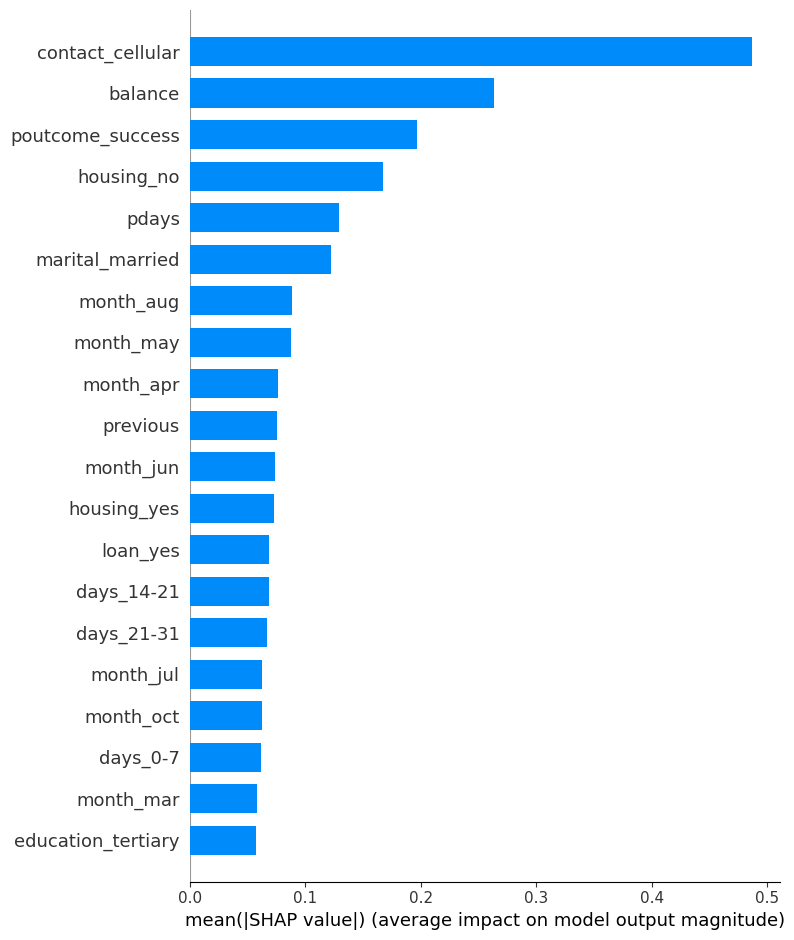

In [ ]:
import shap 
# Create a CatBoostClassifier model
model = CatBoostClassifier(verbose=0, class_weights=[1, 1/y_train.mean()])

# Train the model
model.fit(X_train_2, y_train)


# Generate SHAP values for the test set
explainer = shap.Explainer(model)
shap_values = explainer(X_test_2)
shap.summary_plot(shap_values, X_test_2, plot_type="bar")

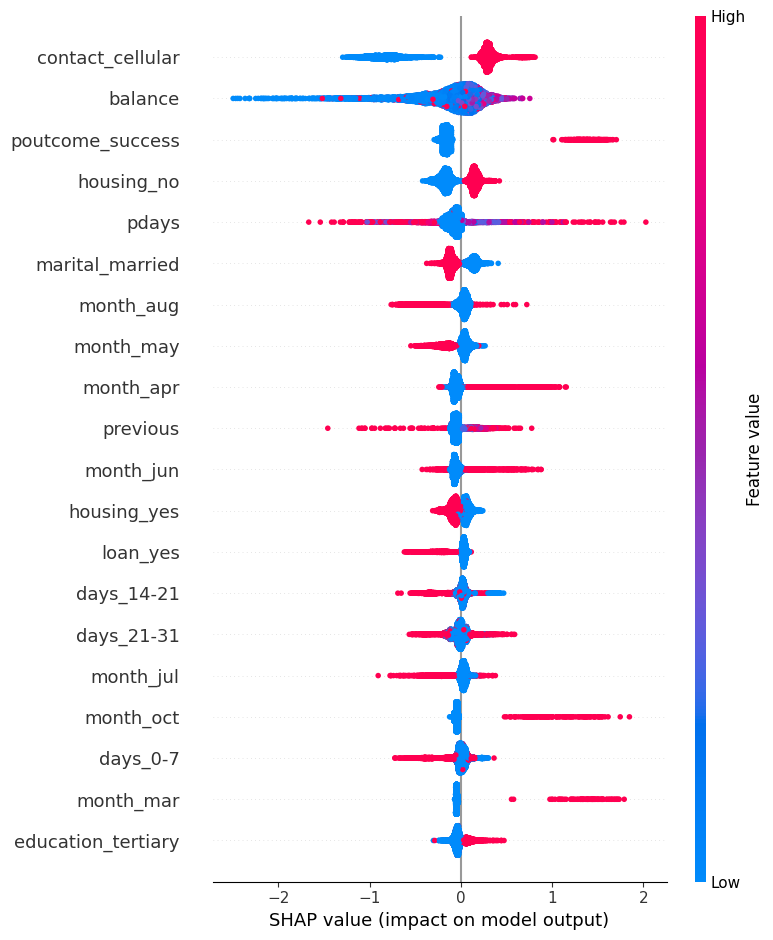

In [ ]:
import matplotlib.pyplot as plt
shap.summary_plot(shap_values, X_test_2)

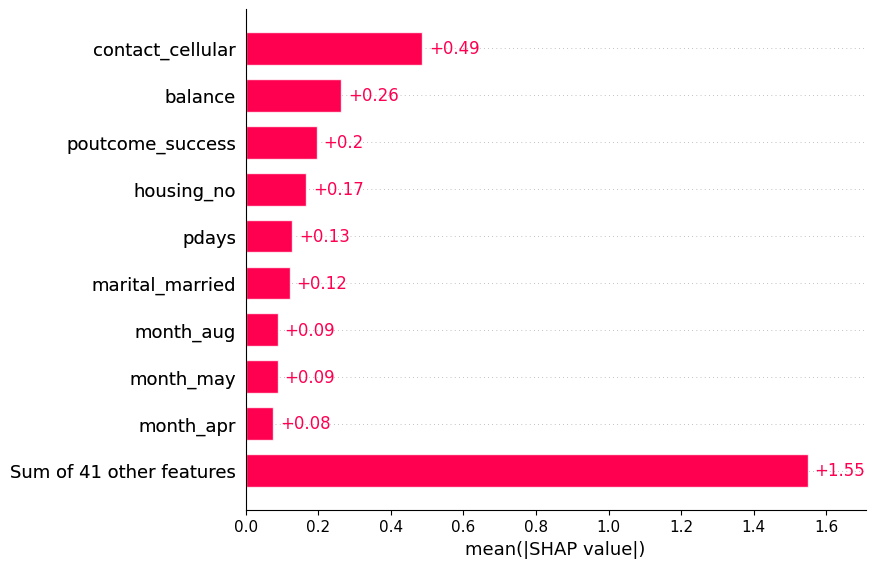

In [ ]:
shap.plots.bar(shap_values, max_display=10)

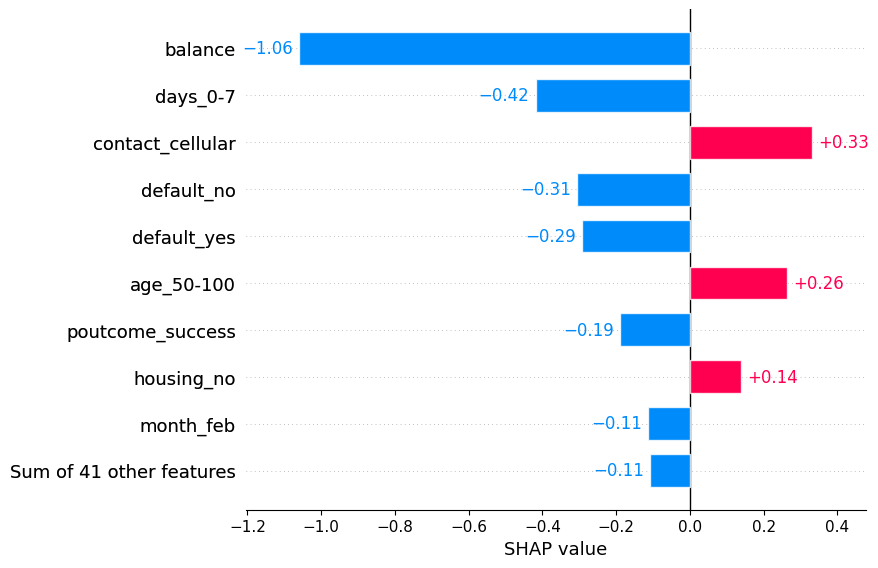

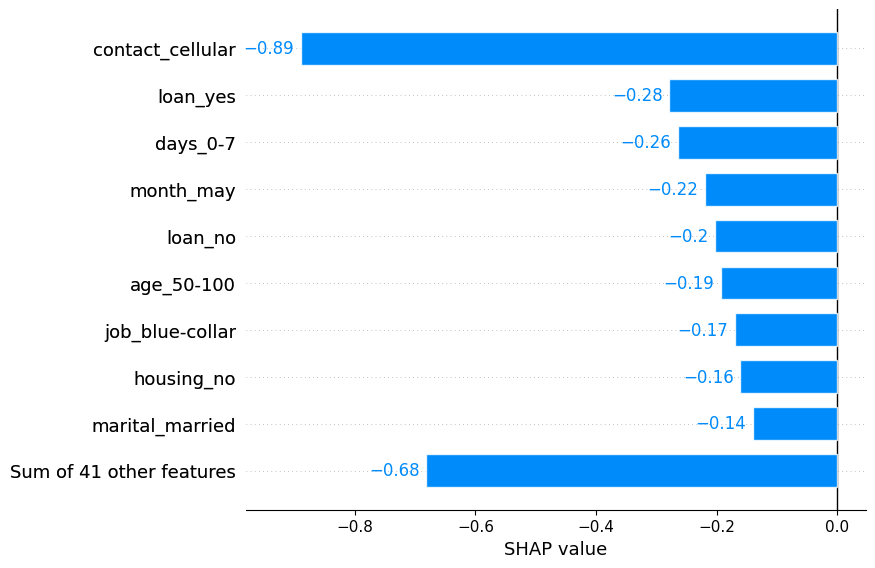

In [ ]:
# Compute the SHAP values for the CatBoost model
explainer = shap.Explainer(model)
shap_values = explainer(X_test_2)

# Get the feature names
feature_names = X_test_2.columns

# Plot the top 10 features for each class
shap.plots.bar(shap_values[0], max_display=10) 
shap.plots.bar(shap_values[1], max_display=10)

# Show the plots
plt.show()


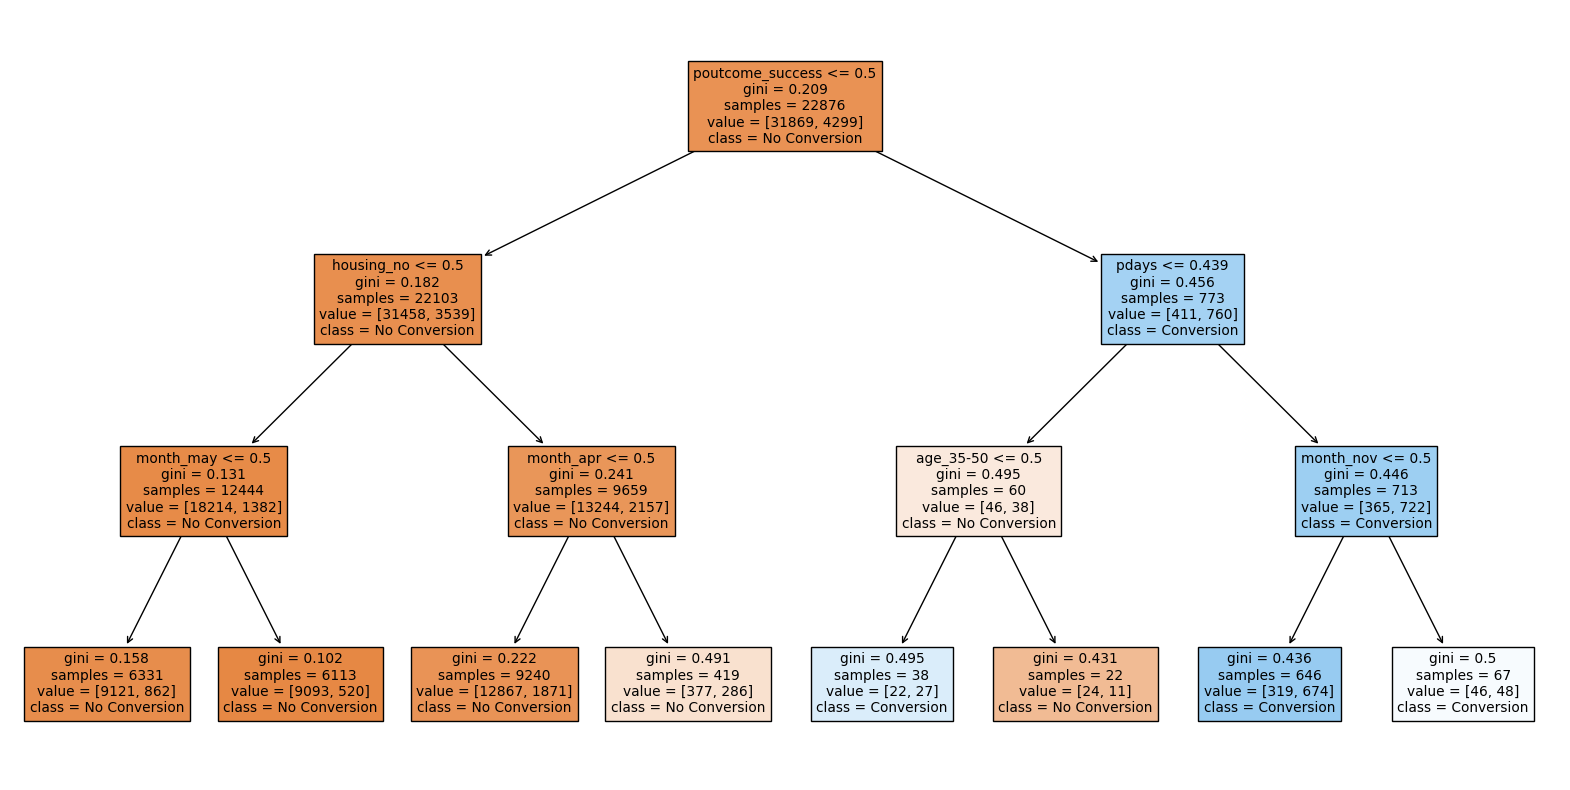

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a Random Forest model
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rfc.fit(X_train_2, y_train)

# Select the tree to plot (e.g. the first tree)
tree_to_plot = 0

# Plot the selected tree
plt.figure(figsize=(20, 10))
plot_tree(rfc.estimators_[tree_to_plot], feature_names=X_train_2.columns, class_names=['No Conversion', 'Conversion'], filled=True)
plt.show()

In [11]:
import mlflow
from datetime import datetime
from sklift.models import SoloModel, TwoModels
from sklift.models import ClassTransformation
from sklift.metrics import uplift_at_k
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define 3 functions and a class transformation
def train_solo_model(X_train, y_train, trmnt_train, estimator):
    smg = SoloModel(estimator)
    smg.fit(X_train, y_train, trmnt_train)
    return smg

def train_two_models(X_train, y_train, trmnt_train, estimator_trmnt, estimator_ctrl):
    tm = TwoModels(estimator_trmnt=estimator_trmnt, estimator_ctrl=estimator_ctrl)
    tm.fit(X_train, y_train, trmnt_train)
    return tm

def train_class_transformation(X_train, y_train, trmnt_train, estimator):
    ct = ClassTransformation(estimator)
    ct.fit(X_train, y_train, trmnt_train)
    return ct

def evaluate_model(model, X_test, y_test, trmnt_test):
    uplift_pred = model.predict(X_test)
    score = uplift_at_k(y_true=y_test, uplift=uplift_pred, treatment=trmnt_test, strategy='by_group', k=0.3)
    return score

class ModelResultsDict:
    def __init__(self):
        self.models_results = {
            'approach': [],
            'uplift@30%': []
        }
        
    def add_results(self, approach, score):
        self.models_results['approach'].append(approach)
        self.models_results['uplift@30%'].append(score)
        
    def get_results(self):
        return self.models_results
    
# Define dictionary to store results
model_results_dict = ModelResultsDict()

In [12]:
# set experiment
experiment_name = "Uplift Models Campaign"
mlflow.set_experiment(experiment_name)


# Create XGBClassifier with class weights
class_weights = len(y_train) / (2 * np.bincount(y_train))

# Define XGBClassifier with class weights
xgb_estimator_trmt = XGBClassifier(max_depth=7, n_estimators=30, random_state=42, scale_pos_weight=class_weights[1]/class_weights[0])
xgb_estimator_ctrl = XGBClassifier(max_depth=7, n_estimators=30, random_state=42, scale_pos_weight=class_weights[1]/class_weights[0])
# Define CatBoostClassifier with class weights
cat_estimator = CatBoostClassifier(verbose=100, random_state=42,thread_count=1)

# Define RandomForestClassifier with class weights
#rf_estimator = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define LogisticRegression with class weights
#lr_estimator = LogisticRegression(class_weight='balanced', random_state=42, max_iter=500)

# Train and evaluate SoloModel 
with mlflow.start_run(run_name='SoloModel_XGB'):
    now = datetime.now()
    smg = train_solo_model(X_train_2, y_train, trmnt_train, xgb_estimator_trmt)
    score = evaluate_model(smg, X_test_2, y_test, trmnt_test)
    model_results_dict.add_results('SoloModel_XGB', score)
    time_execution = datetime.now() - now
    mlflow.log_metric('uplift_30', score)
    mlflow.log_param('model_type', 'SoloModel')
    mlflow.log_param('estimator', 'XGBClassifier')
    mlflow.log_param('time_execution', time_execution)
    
      # Log trained model
    mlflow.sklearn.log_model(smg, 'SoloModels_XGB')

# Train and evaluate TwoModels for XGBClassifier 
with mlflow.start_run(run_name='TwoModels_XGB'):
    now = datetime.now()
    tm = train_two_models(X_train_2, y_train, trmnt_train, xgb_estimator_trmt, xgb_estimator_ctrl )
    score = evaluate_model(tm, X_test_2, y_test, trmnt_test)
    model_results_dict.add_results('TwoModels_XGB', score)
    time_execution = datetime.now() - now
    mlflow.log_metric('uplift_30', score)
    mlflow.log_param('model_type', 'TwoModels')
    mlflow.log_param('estimator_trmnt', 'XGBClassifier')
    mlflow.log_param('estimator_ctrl', 'LogisticRegression')
    mlflow.log_param('time_execution', time_execution)
    
     # Log trained model
    mlflow.sklearn.log_model(tm, 'TwoModels_XGB')

# Train and evaluate ClassTransformation for CatBoostClassifier
with mlflow.start_run(run_name='ClassTransformation_Cat'):
    now = datetime.now()
    ct = train_class_transformation(X_train_2, y_train, trmnt_train, cat_estimator)
    score = evaluate_model(ct, X_test_2, y_test, trmnt_test)
    model_results_dict.add_results('ClassTransformation_Cat', score)
    time_execution = datetime.now() - now
    mlflow.log_metric('uplift_30', score)
    mlflow.log_param('model_type', 'ClassTransformation')
    mlflow.log_param('estimator', 'CatBoostClassifier')
    mlflow.log_param('time_execution', time_execution)
    
     # Log trained model
    mlflow.sklearn.log_model(ct, "class_transformation_model")



# End experiment
mlflow.end_run()
# Print model results dictionary
print(model_results_dict.get_results())


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


Learning rate set to 0.04768
0:	learn: 0.6921120	total: 65.7ms	remaining: 1m 5s
100:	learn: 0.6700617	total: 1s	remaining: 8.95s
200:	learn: 0.6627600	total: 2.12s	remaining: 8.43s
300:	learn: 0.6555666	total: 3.23s	remaining: 7.5s
400:	learn: 0.6495029	total: 4.21s	remaining: 6.29s
500:	learn: 0.6438922	total: 5.14s	remaining: 5.12s
600:	learn: 0.6388209	total: 6s	remaining: 3.98s
700:	learn: 0.6345682	total: 6.88s	remaining: 2.94s
800:	learn: 0.6305303	total: 7.74s	remaining: 1.92s
900:	learn: 0.6260576	total: 8.57s	remaining: 941ms
999:	learn: 0.6222064	total: 9.34s	remaining: 0us
{'approach': ['SoloModel_XGB', 'TwoModels_XGB', 'ClassTransformation_Cat'], 'uplift@30%': [0.23690947799606543, 0.25400194033470774, 0.2944255800792303]}


In [13]:
uplift_metrics = pd.DataFrame((model_results_dict.get_results()))
uplift_metrics                          

,approach,uplift@30%
0,SoloModel_XGB,0.236909
1,TwoModels_XGB,0.254002
2,ClassTransformation_Cat,0.294426


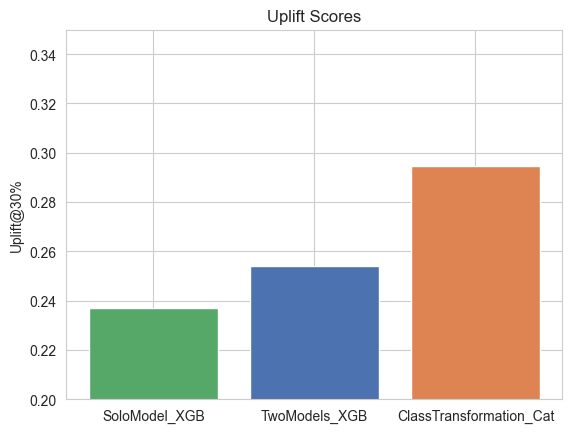

In [ ]:
# Create a bar plot
uplift_scores = uplift_metrics['uplift@30%']   
models = ['SoloModel_XGB', 'TwoModels_XGB', 'ClassTransformation_Cat']
plt.bar(models, uplift_scores, color=['#55A868', '#4C72B0','#DD8452'])
plt.ylim([0.2, 0.35])
plt.title('Uplift Scores')
plt.ylabel('Uplift@30%')
plt.show()


In [15]:

experiment_name = "Uplift Models Campaign"

# Get the experiment ID
experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id

# Query the runs in the experiment
runs = mlflow.search_runs(experiment_ids=experiment_id)

# Print the runs
pd.DataFrame(runs)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.uplift_30,params.estimator,params.time_execution,params.model_type,params.estimator_trmnt,params.estimator_ctrl,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.user
0,af4b942074eb430c97be548979749e6b,517342746135544475,FINISHED,file:///Users/toyosibamidele/Desktop/final/Gro...,2023-03-11 01:59:18.888000+00:00,2023-03-11 01:59:32.109000+00:00,0.294426,CatBoostClassifier,0:00:09.637847,ClassTransformation,None,None,"[{""run_id"": ""af4b942074eb430c97be548979749e6b""...",LOCAL,ClassTransformation_Cat,/Users/toyosibamidele/Library/Python/3.9/lib/p...,toyosibamidele
1,1c2df6b4c44c431f96d77d3e703a9c50,517342746135544475,FINISHED,file:///Users/toyosibamidele/Desktop/final/Gro...,2023-03-11 01:59:13.750000+00:00,2023-03-11 01:59:18.882000+00:00,0.254002,None,0:00:01.896403,TwoModels,XGBClassifier,LogisticRegression,"[{""run_id"": ""1c2df6b4c44c431f96d77d3e703a9c50""...",LOCAL,TwoModels_XGB,/Users/toyosibamidele/Library/Python/3.9/lib/p...,toyosibamidele
2,e729f4e87aaa4a80adce591108165a5d,517342746135544475,FINISHED,file:///Users/toyosibamidele/Desktop/final/Gro...,2023-03-11 01:59:06.634000+00:00,2023-03-11 01:59:13.745000+00:00,0.236909,XGBClassifier,0:00:01.618080,SoloModel,None,None,"[{""run_id"": ""e729f4e87aaa4a80adce591108165a5d""...",LOCAL,SoloModel_XGB,/Users/toyosibamidele/Library/Python/3.9/lib/p...,toyosibamidele


In [17]:
import mlflow.sklearn

# Replace with the actual run ID
run_id =  "af4b942074eb430c97be548979749e6b" 
model_uri = f"runs:/{run_id}/class_transformation_model"
loaded_model = mlflow.sklearn.load_model(model_uri)

# If you get an error, try printing the URI to see if it's correct
print(model_uri)


runs:/af4b942074eb430c97be548979749e6b/class_transformation_model


In [18]:
loaded_model

ClassTransformation(estimator=<catboost.core.CatBoostClassifier object at 0x138f3c2b0>)

In [19]:
uplift_ct = loaded_model.predict(X_test_2)

In [20]:
from sklift.metrics import uplift_by_percentile

ct_percentile = uplift_by_percentile(y_test, uplift_ct, trmnt_test, 
                     strategy='overall', 
                     total=True, std=True, bins=10)
ct_percentile

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,n_treatment,n_control,response_rate_treatment,response_rate_control,uplift,std_treatment,std_control,std_uplift
percentile,,,,,,,,
0-10,512,393,0.500000,0.104326,0.395674,0.022097,0.015420,0.026945
10-20,493,412,0.320487,0.041262,0.279225,0.021017,0.009799,0.023189
20-30,483,422,0.258799,0.016588,0.242211,0.019929,0.006217,0.020876
30-40,504,400,0.180556,0.010000,0.170556,0.017134,0.004975,0.017841
40-50,510,394,0.113725,0.015228,0.098497,0.014058,0.006169,0.015352
50-60,531,373,0.118644,0.008043,0.110601,0.014033,0.004625,0.014775
60-70,530,374,0.103774,0.008021,0.095752,0.013247,0.004613,0.014027
70-80,558,346,0.100358,0.008671,0.091688,0.012720,0.004984,0.013662
80-90,579,325,0.088083,0.003077,0.085006,0.011778,0.003072,0.012172


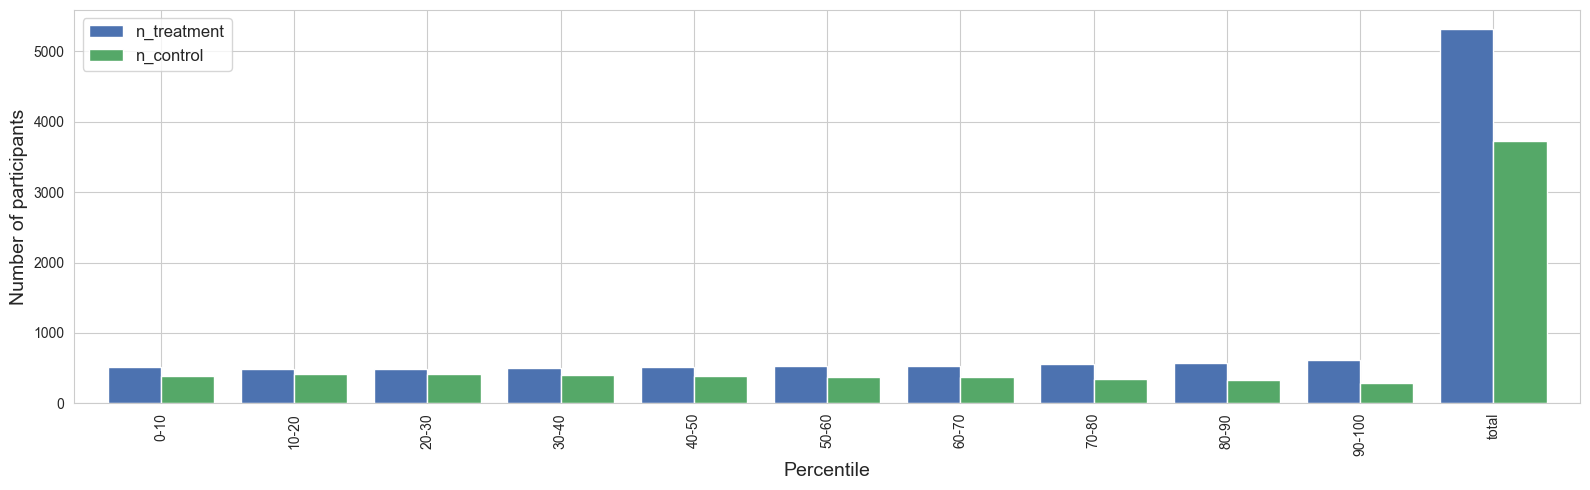

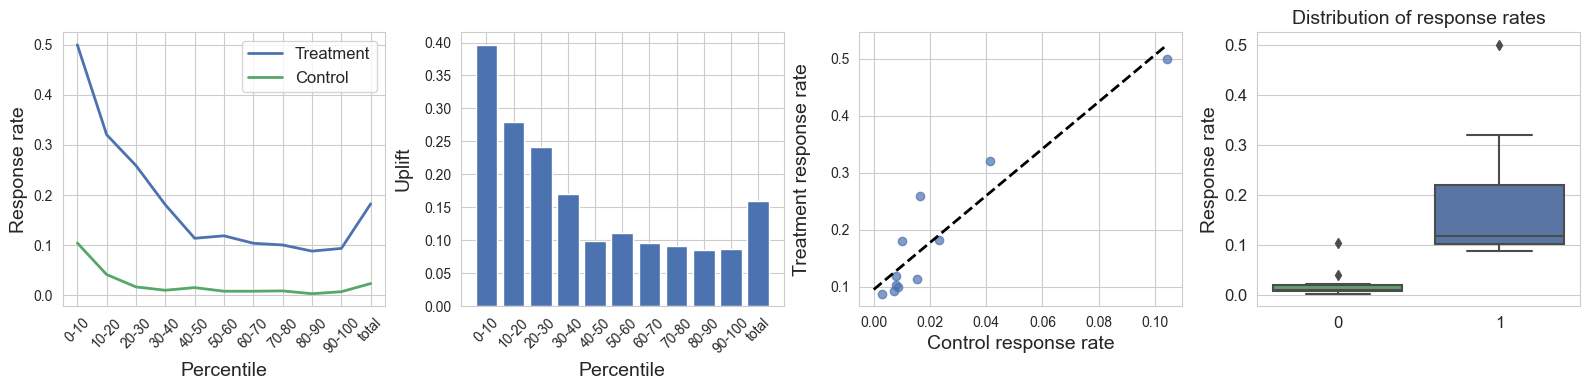

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = ct_percentile 

# Set the default style
sns.set_style('whitegrid')

# Bar chart of the number of participants
fig, axs = plt.subplots(figsize=(16, 5))
df[['n_treatment', 'n_control']].plot(kind='bar', stacked=False, ax=axs, width=0.8, color=['#4C72B0', '#55A868'])
axs.set_xlabel('Percentile', fontsize=14)
axs.set_ylabel('Number of participants', fontsize=14)
axs.tick_params(axis='both', labelsize=10)
axs.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Line chart of the response rates
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].plot(df.index, df['response_rate_treatment'], label='Treatment', color='#4C72B0', linewidth=2)
axs[0].plot(df.index, df['response_rate_control'], label='Control', color='#55A868', linewidth=2)
axs[0].set_xlabel('Percentile', fontsize=14)
axs[0].set_ylabel('Response rate', fontsize=14)
axs[0].tick_params(axis='both', labelsize=10)
axs[0].tick_params(axis='x', rotation = 45)
axs[0].legend(fontsize=12)

# Bar chart of the uplift
axs[1].bar(df.index, df['uplift'], color='#4C72B0')
axs[1].set_xlabel('Percentile', fontsize=14)
axs[1].set_ylabel('Uplift', fontsize=14)
axs[1].tick_params(axis='both', labelsize=10)
axs[1].tick_params(axis='x', rotation = 45)
# Adjust the position of the y-axis label
axs[1].yaxis.set_label_coords(-0.15, 0.5)

# Scatter plot of the response rates
axs[2].scatter(df['response_rate_control'], df['response_rate_treatment'], color='#4C72B0', alpha=0.7)
axs[2].set_xlabel('Control response rate', fontsize=14)
axs[2].set_ylabel('Treatment response rate', fontsize=14)
axs[2].tick_params(axis='both', labelsize=10)
axs[2].tick_params(axis='x', labelsize=10)
# Add a regression line
import numpy as np
from scipy.stats import linregress
x = df['response_rate_control']
y = df['response_rate_treatment']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line_x = np.linspace(0, max(x))
line_y = slope * line_x + intercept
axs[2].plot(line_x, line_y, color='black', linestyle='--', linewidth=2)
# Adjust the position of the y-axis label
axs[2].yaxis.set_label_coords(-0.15, 0.5)

# Box plot of the response rates
sns.boxplot(data=[df['response_rate_control'], df['response_rate_treatment']], palette=['#55A868', '#4C72B0'], ax=axs[3])
axs[3].set_ylabel('Response rate', fontsize=14)
axs[3].set_title('Distribution of response rates', fontsize=14)
axs[3].tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()


In [21]:
# convert the arrays to pandas Series
uplift_sm = pd.Series(uplift_ct)
trmnt_test = pd.Series(trmnt_test)
y_test = pd.Series(y_test)

# create a new column in the test set dataframe and assign uplift scores to it
test_set_df = pd.concat([X_test_2.reset_index(drop=True), trmnt_test.reset_index(drop=True), y_test.reset_index(drop=True), uplift_sm.reset_index(drop=True)], axis=1)
test_set_df.columns = list(X_test_2.columns) + ['treatment_tag', 'conversion', 'uplift_score']


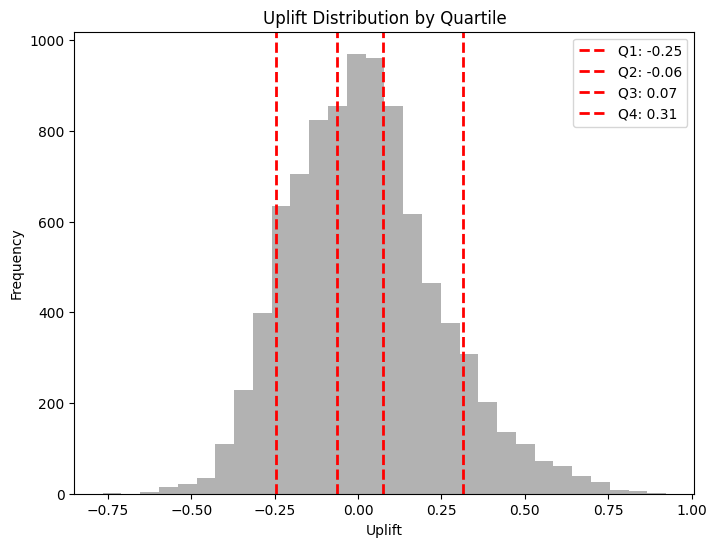

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = test_set_df


# Bin uplift into quartiles using qcut
df['uplift_bin'] = pd.qcut(df['uplift_score'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Plot histogram of uplift distribution by bin
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df['uplift_score'], bins=30, color='gray', alpha=0.6)
for bin_label in ['Q1', 'Q2', 'Q3', 'Q4']:
    bin_mean = df[df['uplift_bin'] == bin_label]['uplift_score'].mean()
    ax.axvline(x=bin_mean, color='red', linestyle='--', linewidth=2, label=f'{bin_label}: {bin_mean:.2f}')
ax.set_xlabel('Uplift')
ax.set_ylabel('Frequency')
ax.set_title('Uplift Distribution by Quartile')
ax.legend()
plt.show()


In [23]:
df = test_set_df

# Categorize customers based on uplift
df['uplift_category'] = pd.qcut(df['uplift_score'], q=[0, 0.2, 0.5, 0.8, 1], labels=['Lost Causes', 'Sleeping Dogs', 'Persuadable', 'Sure Things'])


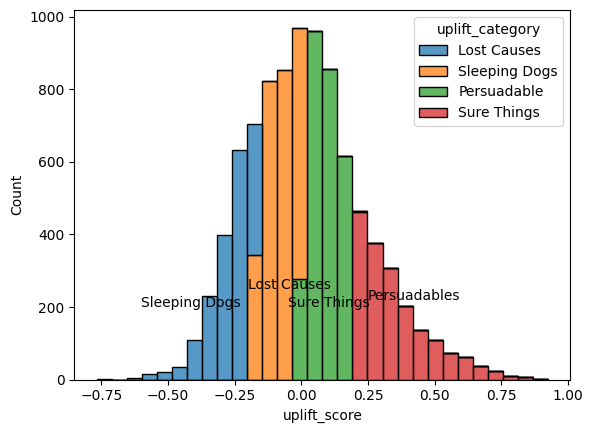

In [25]:
import seaborn as sns
df = test_set_df

# Categorize customers based on uplift
df['uplift_category'] = pd.qcut(df['uplift_score'], q=[0, 0.2, 0.5, 0.8, 1], labels=['Lost Causes', 'Sleeping Dogs', 'Persuadable', 'Sure Things'])

# Plot histogram of uplift by category
sns.histplot(data=df, x='uplift_score', hue='uplift_category', multiple='stack', bins=30)

# Add annotations to indicate where the sleeping dogs, lost causes, persuadable, and sure things fall
plt.annotate('Sleeping Dogs', xy=(-0.25, 80), xytext=(-0.6, 200))
plt.annotate('Lost Causes', xy=(-0.03, 120), xytext=(-0.2, 250))
plt.annotate('Sure Things', xy=(0.28, 80), xytext=(-0.05, 200) )
plt.annotate('Persuadables', xy=(0.12, 150), xytext=(0.25, 220))

# Adjust font size of annotations
plt.rcParams.update({'font.size': 10})


# Show plot
plt.show()


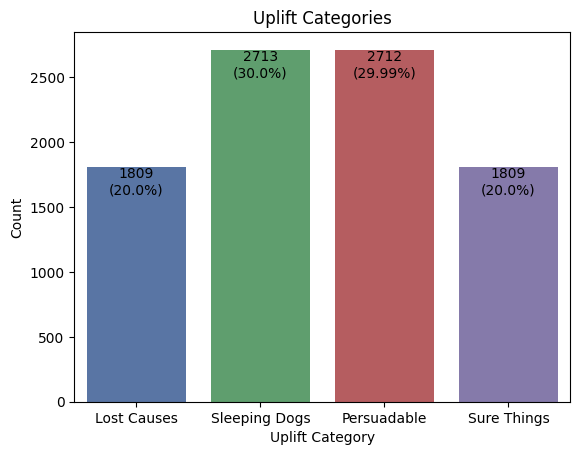

In [26]:
import seaborn as sns

# Set color palette
sns.set_palette(['#4C72B0', '#55A868', '#C44E52', '#8172B2'])

# Create a count plot of the uplift_category column
sns.countplot(data=df, x='uplift_category')

# Get the counts and percentages for each category
counts = df['uplift_category'].value_counts()
counts = counts.sort_index()
percentages = df['uplift_category'].value_counts(normalize=True) * 100

# Add annotations for each category with count and percent of total
for i, category in enumerate(counts.index):
    count = counts[category]
    percent = round(percentages[category], 2)
    plt.annotate(f'{count}\n({percent}%)', xy=(i, count), ha='center', va='top', fontsize=10)

# Set the plot title and axis labels
plt.title('Uplift Categories', fontsize=12)
plt.xlabel('Uplift Category', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Set the y-axis limit to avoid overlap with the title
plt.ylim(0, max(counts.values) * 1.05)

# Show the plot
plt.show()


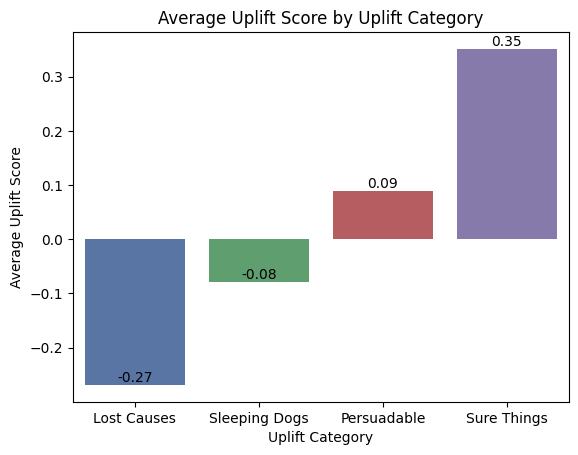

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by uplift category and calculate mean uplift score
uplift_scores = df.groupby('uplift_category').mean()[['uplift_score']]

# Set color palette
sns.set_palette(['#4C72B0', '#55A868', '#C44E52', '#8172B2'])

# Create bar plot
ax = sns.barplot(data=uplift_scores, x=uplift_scores.index, y='uplift_score')

# Add the average uplift score as a label to the bars
for i, score in enumerate(uplift_scores['uplift_score']):
    ax.text(i, score , round(score, 2), ha='center', va='bottom', fontsize=10)

# Set the plot title and axis labels
plt.title('Average Uplift Score by Uplift Category', fontsize=12)
plt.xlabel('Uplift Category', fontsize=10)
plt.ylabel('Average Uplift Score', fontsize=10)

# Show the plot
plt.show()





In [28]:
demo_cols = ['job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary','age_0-25', 'age_25-35', 'age_35-50',
       'age_50-100']

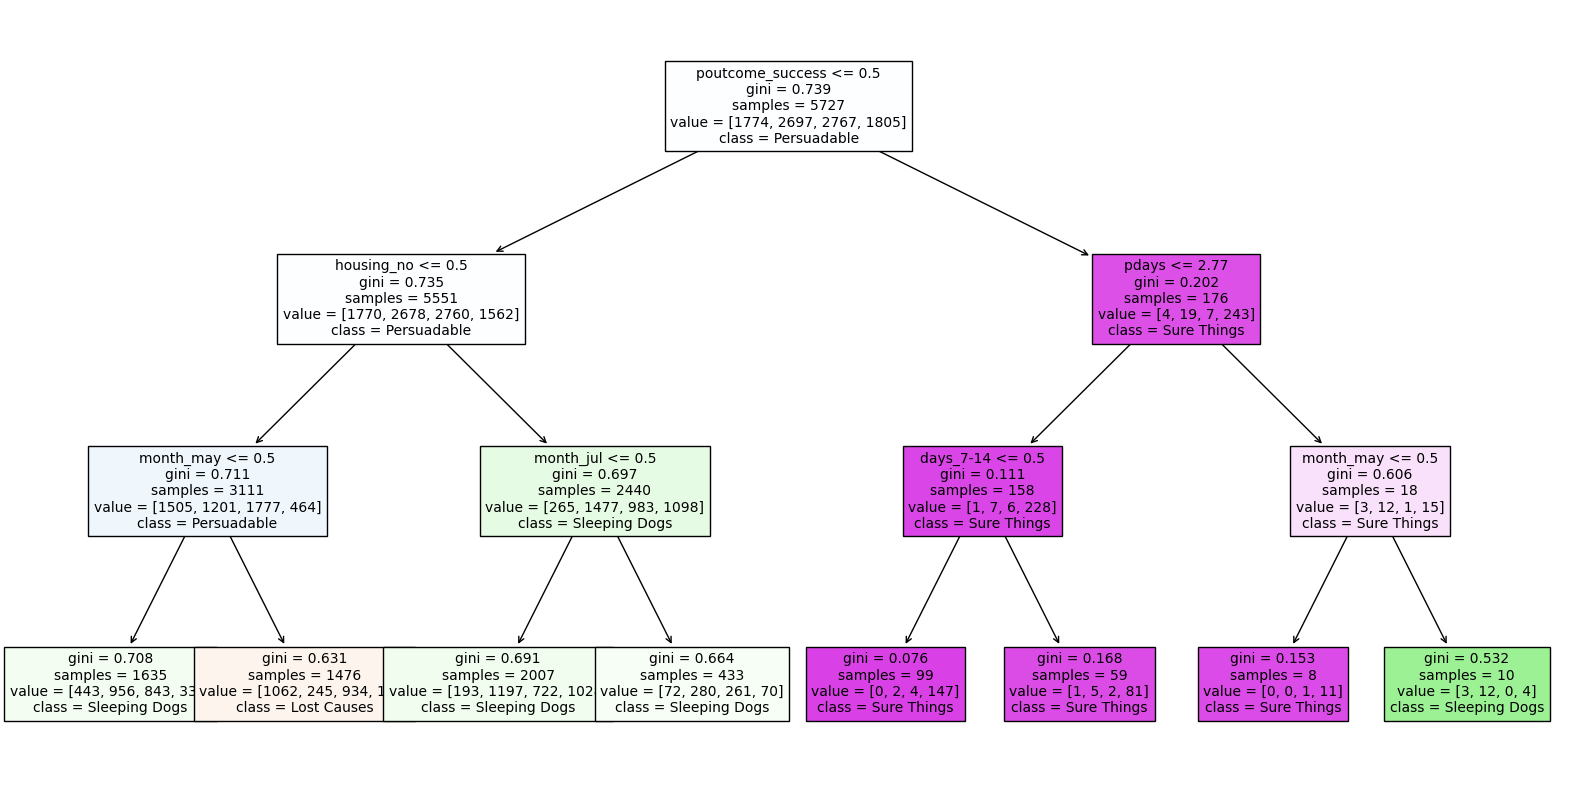

In [29]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Create a list of predictors, excluding uplift_category and target
predictors =[col for col in df.columns if col not in ['treatment_tag', 'conversion', 'uplift_score', 'uplift_bin','uplift_category']]

target = 'uplift_category'
# Fit a decision tree model
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rfc.fit(df[predictors], df[target])

tree_to_plot = 0
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(rfc.estimators_[tree_to_plot], feature_names=predictors, class_names=df[target].cat.categories, filled=True, fontsize=10)

# Show the plot
plt.show()


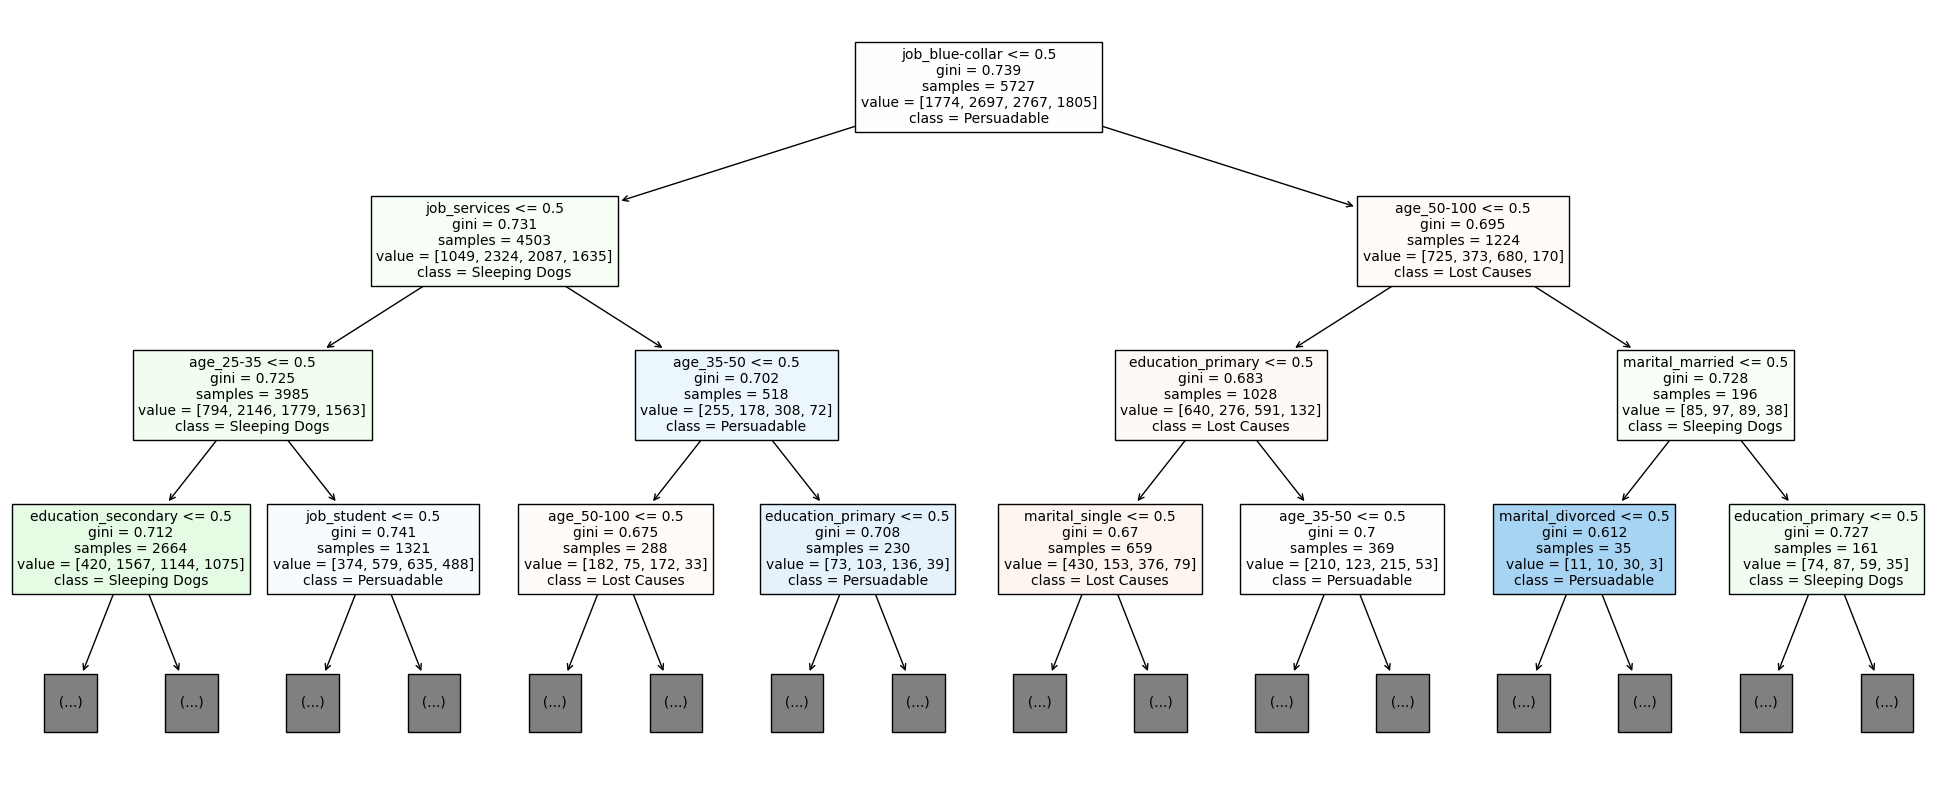

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree



target = 'uplift_category'
# Fit a decision tree model
rfc = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rfc.fit(df[demo_cols], df[target])

tree_to_plot = 0
# Plot the decision tree
plt.figure(figsize=(25, 10))
plot_tree(rfc.estimators_[tree_to_plot], feature_names=demo_cols, class_names=df[target].cat.categories, filled=True, fontsize=10, max_depth=3)

# Show the plot
plt.show()


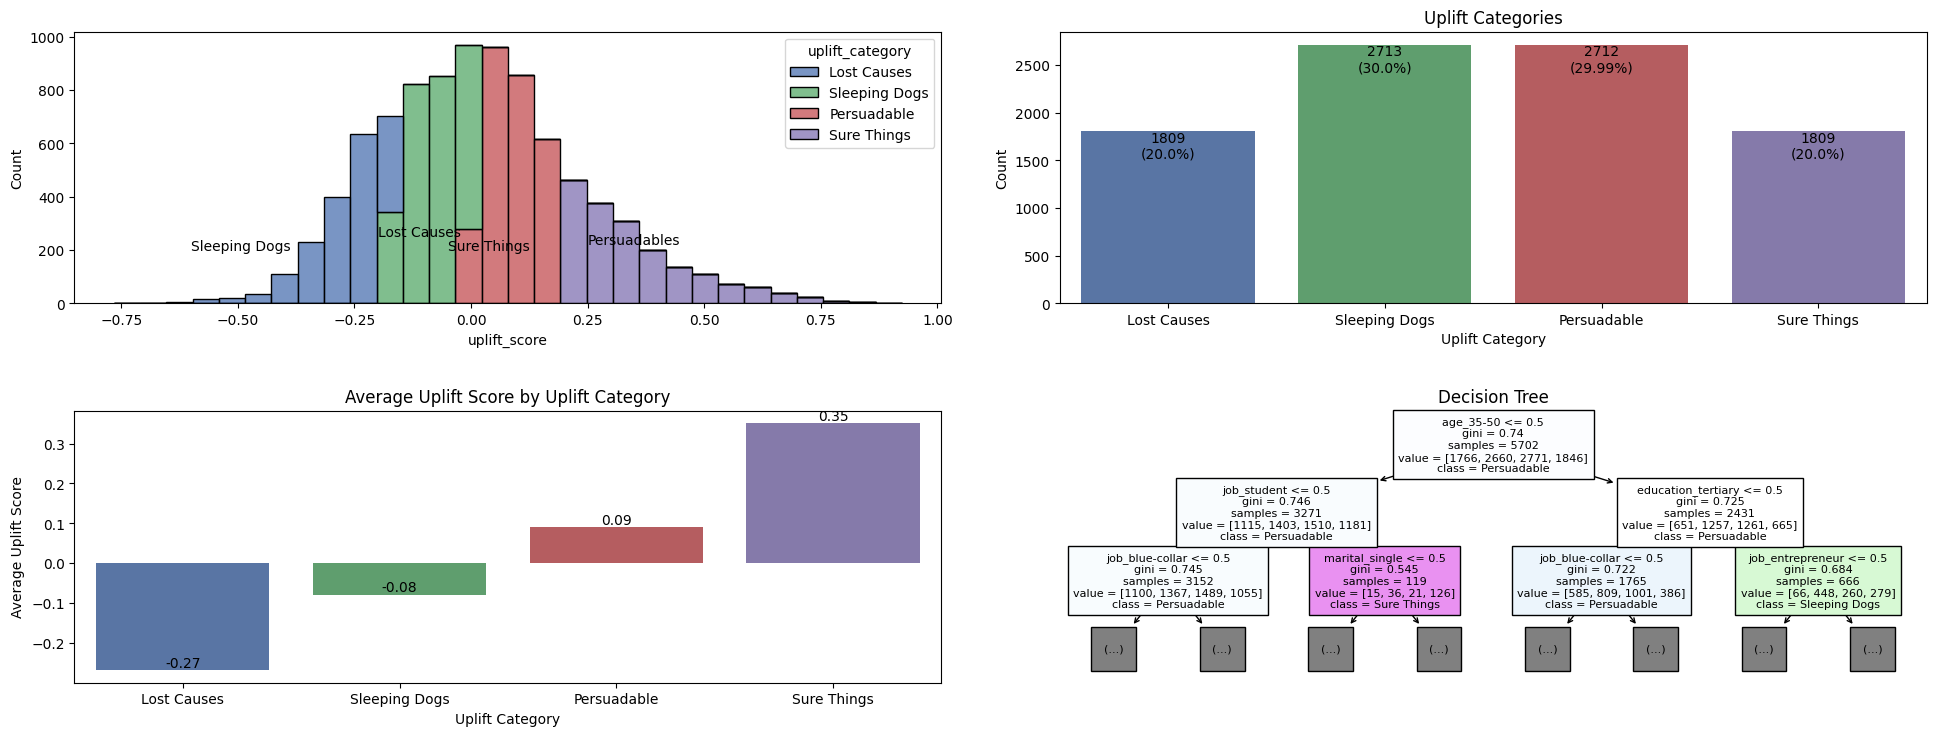

<Figure size 2500x1000 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axes
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

# Set color palette
sns.set_palette(['#4C72B0', '#55A868', '#C44E52', '#8172B2'])

# Categorize customers based on uplift
df['uplift_category'] = pd.qcut(df['uplift_score'], q=[0, 0.2, 0.5, 0.8, 1], labels=['Lost Causes', 'Sleeping Dogs', 'Persuadable', 'Sure Things'])

# Plot histogram of uplift by category
sns.histplot(data=df, x='uplift_score', hue='uplift_category', multiple='stack', bins=30, ax=axs[0, 0])

# Add annotations to indicate where the sleeping dogs, lost causes, persuadable, and sure things fall
axs[0, 0].annotate('Sleeping Dogs', xy=(-0.25, 80), xytext=(-0.6, 200))
axs[0, 0].annotate('Lost Causes', xy=(-0.03, 120), xytext=(-0.2, 250))
axs[0, 0].annotate('Sure Things', xy=(0.28, 80), xytext=(-0.05, 200) )
axs[0, 0].annotate('Persuadables', xy=(0.12, 150), xytext=(0.25, 220))

# Adjust font size of annotations
axs[0, 0].tick_params(labelsize=10)

# Create a count plot of the uplift_category column
sns.countplot(data=df, x='uplift_category', ax=axs[0, 1])

# Get the counts and percentages for each category
counts = df['uplift_category'].value_counts()
counts = counts.sort_index()
percentages = df['uplift_category'].value_counts(normalize=True) * 100

# Add annotations for each category with count and percent of total
for i, category in enumerate(counts.index):
    count = counts[category]
    percent = round(percentages[category], 2)
    axs[0, 1].annotate(f'{count}\n({percent}%)', xy=(i, count), ha='center', va='top', fontsize=10)

# Set the plot title and axis labels
axs[0, 1].set_title('Uplift Categories', fontsize=12)
axs[0, 1].set_xlabel('Uplift Category', fontsize=10)
axs[0, 1].set_ylabel('Count', fontsize=10)

# Set the y-axis limit to avoid overlap with the title
axs[0, 1].set_ylim(0, max(counts.values) * 1.05)

# Group by uplift category and calculate mean uplift score
uplift_scores = df.groupby('uplift_category').mean()[['uplift_score']]

# Create bar plot
ax = sns.barplot(data=uplift_scores, x=uplift_scores.index, y='uplift_score', ax=axs[1, 0])

# Add the average uplift score as a label to the bars
for i, score in enumerate(uplift_scores['uplift_score']):
    ax.text(i, score, round(score, 2), ha='center', va='bottom', fontsize=10)

#Set the plot title and axis labels

axs[1, 0].set_title('Average Uplift Score by Uplift Category', fontsize=12)
axs[1, 0].set_xlabel('Uplift Category', fontsize=10)
axs[1, 0].set_ylabel('Average Uplift Score', fontsize=10)

#Plot the decision tree

target = 'uplift_category'
rfc = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
rfc.fit(df[demo_cols], df[target])

tree_to_plot = 0
plt.figure(figsize=(25, 10))
plot_tree(rfc.estimators_[tree_to_plot], feature_names=demo_cols, class_names=df[target].cat.categories, filled=True, fontsize=8, max_depth=2, ax=axs[1, 1])

#Set the plot title and axis labels

axs[1, 1].set_title('Decision Tree', fontsize=12)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('')

##Adjust spacing between plots

fig.tight_layout(pad=3)

#Show the plot

plt.show()
